We will start by downloading 20-newsgroup text dataset:

```http://scikit-learn.org/stable/datasets/index.html#the-20-newsgroups-text-dataset```

In [1]:
import os
import random
import pickle as pkl
import copy
import re
import matplotlib.pyplot as plt

In [102]:
# import training and testing data from file
import pickle as pkl

# import data regularly
def import_data(dir):
    dataset = []
    for file_dir in os.listdir(dir):
        with open(dir+'/'+file_dir) as f:
            dataset.append(f.read())
    return dataset

# import data removing all html tags
def import_data_clean_html(dir):
    dataset = []
    html_rm = re.compile('<.*?>')
    for file_dir in os.listdir(dir):
        with open(dir+'/'+file_dir) as f:
            stc = f.read()
            no_html_stc = re.sub(html_rm, '', stc)
            dataset.append(no_html_stc)
    return dataset


# import data with and without html tags
pos_train_data = import_data("aclImdb/train/pos")
neg_train_data = import_data("aclImdb/train/neg")
pos_test_data = import_data("aclImdb/test/pos")
neg_test_data = import_data("aclImdb/test/neg")

pos_train_data_no_html = import_data_clean_html("aclImdb/train/pos")
neg_train_data_no_html = import_data_clean_html("aclImdb/train/neg")
pos_test_data_no_html = import_data_clean_html("aclImdb/test/pos")
neg_test_data_no_html = import_data_clean_html("aclImdb/test/neg")



# concatenate positive and negative training data, testing data
train_data = pos_train_data+neg_test_data
train_target = [1]*len(pos_train_data)+[0]*len(neg_train_data)
test_data = pos_test_data+neg_test_data
test_target = [1]*len(pos_test_data)+[0]*len(neg_test_data)

train_data_nh = pos_train_data_no_html+neg_test_data_no_html
#train_target_nh = [1]*len(pos_train_data_no_html)+[0]*len(neg_train_data_no_html)
test_data_nh = pos_test_data_no_html+neg_test_data_no_html
#test_target_nh = [1]*len(pos_test_data_no_html)+[0]*len(neg_test_data_no_html)

# split train into train and validation 
val_idx = random.sample(range(len(train_data)), 5000)
pkl.dump(val_idx, open("val_idx.p", "wb"))

val_data = [train_data[i] for i in val_idx]
val_target = [train_target[i] for i in val_idx]

val_data_nh = [train_data_nh[i] for i in val_idx]

train_sub_data = [train_data[i] for i in range(len(train_data)) if i not in val_idx]
train_sub_target = [train_target[i] for i in range(len(train_data)) if i not in val_idx]

train_sub_data_nh = [train_data_nh[i] for i in range(len(train_data_nh)) if i not in val_idx]

In [ ]:
#!pip install spacy
!python -m spacy download en_core_web_sm

In [17]:
# tokenize function
import spacy
import string

# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
    tokens = tokenizer(sent)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]



In [54]:
# tokenize data, remove punct. lower case
def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample)        
        token_dataset.append(tokens)
        
        all_tokens += tokens

    return token_dataset, all_tokens
# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset(val_data)
pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))
pkl.dump(val_target, open("val_target.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))
pkl.dump(test_target, open("test_target.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_sub_data)
pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))
pkl.dump(train_sub_target, open("train_target.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [18]:
# tokenize data removed html tags, remove punc lowercase
# val set tokens
print ("Tokenizing val data")
val_data_tokens_nh, _ = tokenize_dataset(val_data_nh)
pkl.dump(val_data_tokens_nh, open("val_data_tokens_nh.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens_nh, _ = tokenize_dataset(test_data_nh)
pkl.dump(test_data_tokens_nh, open("test_data_tokens_nh.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens_nh, all_train_tokens_nh = tokenize_dataset(train_sub_data_nh)
pkl.dump(train_data_tokens_nh, open("train_data_tokens_nh.p", "wb"))
pkl.dump(all_train_tokens_nh, open("all_train_tokens_nh.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [73]:
# without post-processing
def tokenize_dataset_raw(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        # directly call tokenizer
        tokens = [token.text for token in tokenizer(sample)]
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

print ("Tokenizing val data")
val_data_tokens_raw, _ = tokenize_dataset_raw(val_data)
pkl.dump(val_data_tokens_raw, open("val_data_tokens_raw.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens_raw, _ = tokenize_dataset_raw(test_data)
pkl.dump(test_data_tokens_raw, open("test_data_tokens_raw.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens_raw, all_train_tokens_raw = tokenize_dataset_raw(train_sub_data)
pkl.dump(train_data_tokens_raw, open("train_data_tokens_raw.p", "wb"))
pkl.dump(all_train_tokens_raw, open("all_train_tokens_raw.p", "wb"))


Tokenizing val data
Tokenizing test data
Tokenizing train data


In [26]:
import pickle as pkl
# First, download datasets from here
train_data_tokens = pkl.load(open("train_data_tokens.p", "rb"))
train_data_tokens_nh = pkl.load(open("train_data_tokens_nh.p", "rb"))


all_train_tokens = pkl.load(open("all_train_tokens.p", "rb"))
all_train_tokens_nh = pkl.load(open("all_train_tokens_nh.p", "rb"))

train_data_tokens_raw = pkl.load(open("train_data_tokens_raw.p", "rb"))
all_train_tokens_raw = pkl.load(open("all_train_tokens_raw.p", "rb"))

train_target = pkl.load(open("train_target.p", "rb"))

val_data_tokens = pkl.load(open("val_data_tokens.p", "rb"))
val_data_tokens_nh = pkl.load(open("val_data_tokens_nh.p", "rb"))
val_data_tokens_raw = pkl.load(open("val_data_tokens_raw.p", "rb"))

val_target = pkl.load(open("val_target.p", "rb"))

test_data_tokens = pkl.load(open("test_data_tokens.p", "rb"))
test_data_tokens_raw = pkl.load(open("test_data_tokens_raw.p", "rb"))
test_data_tokens_nh = pkl.load(open("test_data_tokens_nh.p", "rb"))

test_target = pkl.load(open("test_target.p", "rb"))


# double checking
print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 4817127


Now, we are going to create the vocabulary of most common 10,000 tokens in the training set.

In [3]:
# build n gram tokens
def n_gram_token(tokens, n):
    new_tokens = []
    for idx, word in enumerate(tokens):
        if idx < len(tokens)-(n-1):
            for i in range(1,n):
                word += (" "+tokens[i+idx])
            new_tokens += [word]
    return new_tokens

# return list of tokens that contains tokens for i<=n 
def get_n_gram_tokens(n, tokens):
    list_of_n_tokens = []
    for i in range(2,n+1):
        list_of_n_tokens.append([n_gram_token(token_i,i) for token_i in tokens])
    return list_of_n_tokens

# get token list
train_token_list = get_n_gram_tokens(4, train_data_tokens)
val_token_list = get_n_gram_tokens(4, val_data_tokens)
test_token_list = get_n_gram_tokens(4, test_data_tokens)

train_token_list_raw = get_n_gram_tokens(4, train_data_tokens_raw)
val_token_list_raw = get_n_gram_tokens(4, val_data_tokens_raw)
test_token_list_raw = get_n_gram_tokens(4, test_data_tokens_raw)

train_token_list_nh = get_n_gram_tokens(4, train_data_tokens_nh)
val_token_list_nh = get_n_gram_tokens(4, val_data_tokens_nh)
test_token_list_nh = get_n_gram_tokens(4, test_data_tokens_nh)

In [4]:
# build all training token based on n-gram
def build_all_token_list(n, original_tokens, train_tokens):
    all_tr_token=[]
    for i in range(n-1):
        for tr_token in train_tokens[i]:
            all_tr_token += tr_token
    return original_tokens+all_tr_token

In [6]:
# build vocabs
from collections import Counter

# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(n, original_tokens,max_vocab_size, train_tokens = train_token_list):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    all_tokens = build_all_token_list(n, original_tokens, train_tokens)
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token



# convert token to id in the dataset
def token2index_dataset(tokens_data, token2id):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data



Now we are going to create PyTorch DataLoader 

In [7]:
# data loader
max_sentence_length_default = 200

import numpy as np
import torch
from torch.utils.data import Dataset

class movieDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list, max_sentence_length = max_sentence_length_default):
        """
        @param data_list: list of movie review tokens 
        @param target_list: list of movie review targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        self.max_sentence_length = max_sentence_length
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:self.max_sentence_length]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def movie_collate_func(batch, max_sentence_length = max_sentence_length_default):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,max_sentence_length-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]



Here we will define Bag-of-Words model in PyTorch

In [8]:
# model
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding; 100 at least
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,20)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out



In [9]:
# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)



In [10]:
# function to run model
optimizer_default = "adam"
def run_model(emb_dim, learning_rate, num_epochs, train_loader, val_loader, id2token, optimizer_str, la = False):
    
    model = BagOfWords(len(id2token), emb_dim)
    criterion = torch.nn.CrossEntropyLoss()  
    if optimizer_str == "adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    else:
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    if la:
        scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=(lambda ep: 0.95**ep))
    val_accuracy = []
    train_loss = []
    epoch_list = []
    for epoch in range(num_epochs):
            running_loss = 0
            if la:
                scheduler.step()
            for i, (data, lengths, labels) in enumerate(train_loader):
                model.train()
                data_batch, length_batch, label_batch = data, lengths, labels
                optimizer.zero_grad()
                outputs = model(data_batch, length_batch)
                loss = criterion(outputs, label_batch)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i > 0 and i % 50 == 0:
                    # validate
                    val_acc = test_model(val_loader, model)
                    train_loss.append(running_loss/50)
                    val_accuracy.append(val_acc)
                    epoch_list.append(str((epoch+1, i+1)))
                    print('Epoch: [{}/{}], Step: [{}/{}], trainning loss: {}, Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), running_loss/50,val_acc))
                    running_loss = 0


            
            # print accuracy every epoch
    
    val_acc_i = test_model(val_loader, model)
    max_val = max(val_accuracy)
    
    return max(max_val, val_acc_i), train_loss, val_accuracy, epoch_list

    

    


Tune tokenization
with post-processing
Epoch: [1/2], Step: [51/625], trainning loss: 1.0529281711578369, Validation Acc: 61.0
Epoch: [1/2], Step: [101/625], trainning loss: 0.5911964917182922, Validation Acc: 77.98
Epoch: [1/2], Step: [151/625], trainning loss: 0.45173071563243866, Validation Acc: 82.02
Epoch: [1/2], Step: [201/625], trainning loss: 0.39662293463945386, Validation Acc: 84.46
Epoch: [1/2], Step: [251/625], trainning loss: 0.3757523149251938, Validation Acc: 86.1
Epoch: [1/2], Step: [301/625], trainning loss: 0.33296981871128084, Validation Acc: 86.42
Epoch: [1/2], Step: [351/625], trainning loss: 0.3155215835571289, Validation Acc: 85.6
Epoch: [1/2], Step: [401/625], trainning loss: 0.3436631843447685, Validation Acc: 85.5
Epoch: [1/2], Step: [451/625], trainning loss: 0.3176623997092247, Validation Acc: 87.02
Epoch: [1/2], Step: [501/625], trainning loss: 0.29736348152160647, Validation Acc: 86.9
Epoch: [1/2], Step: [551/625], trainning loss: 0.34453202575445174, Valid

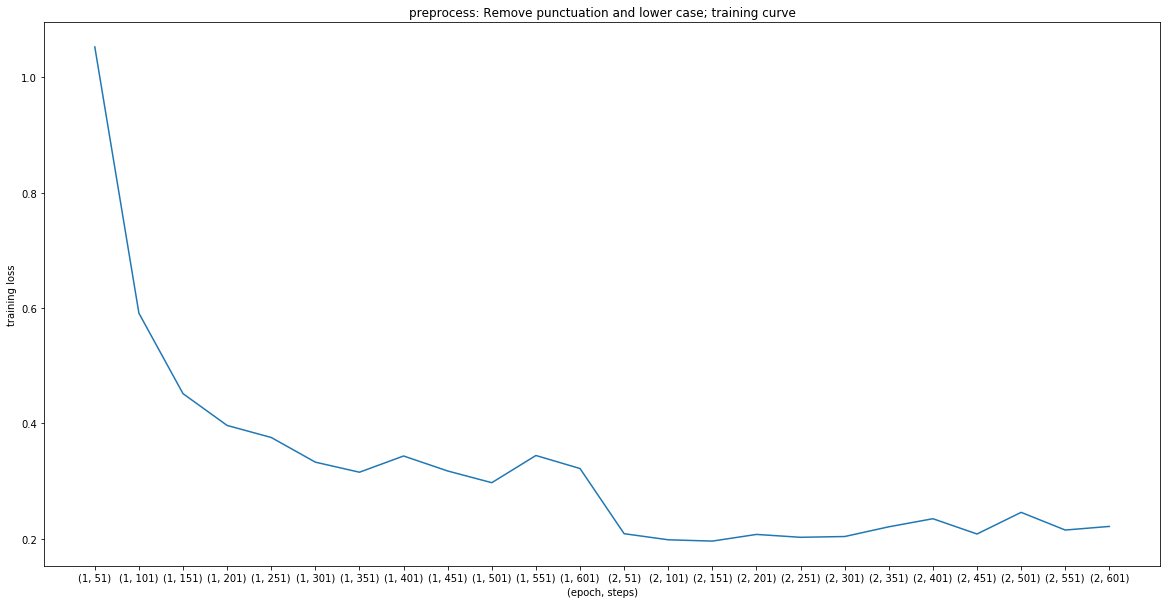

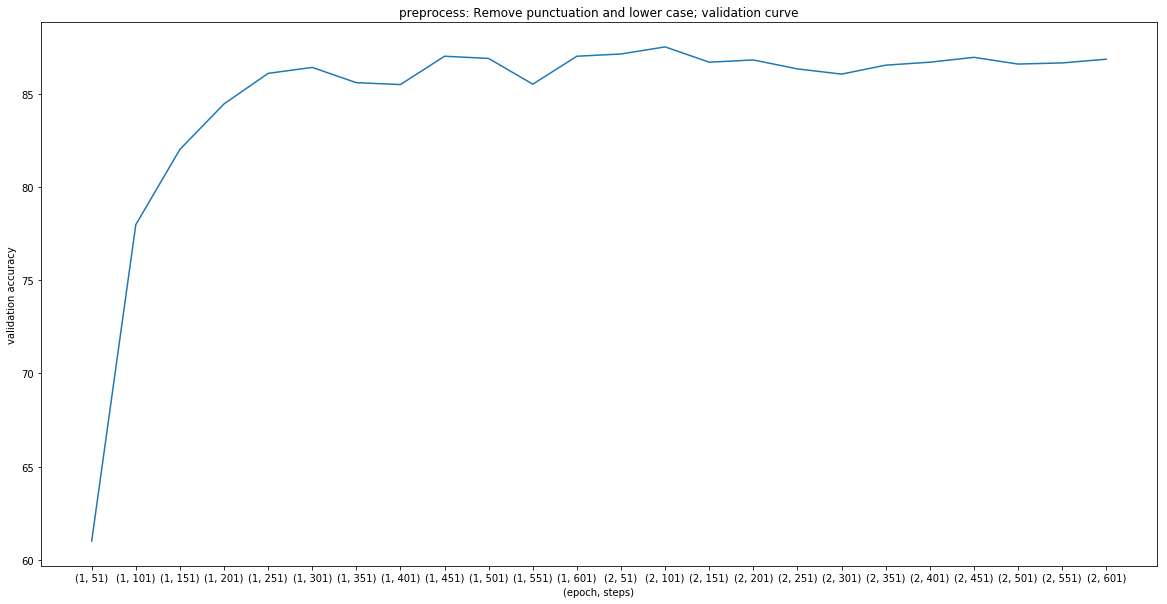

without post-processing
Epoch: [1/2], Step: [51/625], trainning loss: 1.0362400901317597, Validation Acc: 69.94
Epoch: [1/2], Step: [101/625], trainning loss: 0.598250949382782, Validation Acc: 75.5
Epoch: [1/2], Step: [151/625], trainning loss: 0.4954378342628479, Validation Acc: 81.46
Epoch: [1/2], Step: [201/625], trainning loss: 0.42756538331508637, Validation Acc: 82.6
Epoch: [1/2], Step: [251/625], trainning loss: 0.3640439033508301, Validation Acc: 82.1
Epoch: [1/2], Step: [301/625], trainning loss: 0.35168228089809417, Validation Acc: 84.82
Epoch: [1/2], Step: [351/625], trainning loss: 0.34949801474809644, Validation Acc: 85.82
Epoch: [1/2], Step: [401/625], trainning loss: 0.3419096213579178, Validation Acc: 85.7
Epoch: [1/2], Step: [451/625], trainning loss: 0.33974206924438477, Validation Acc: 86.64
Epoch: [1/2], Step: [501/625], trainning loss: 0.3007652413845062, Validation Acc: 86.94
Epoch: [1/2], Step: [551/625], trainning loss: 0.3245080655813217, Validation Acc: 87.26

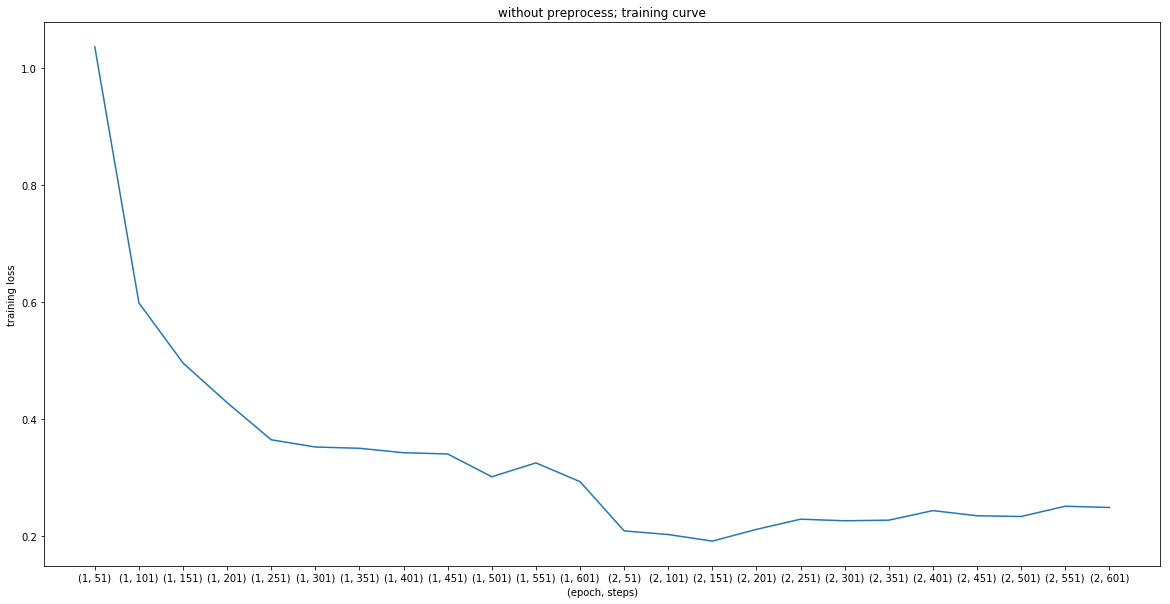

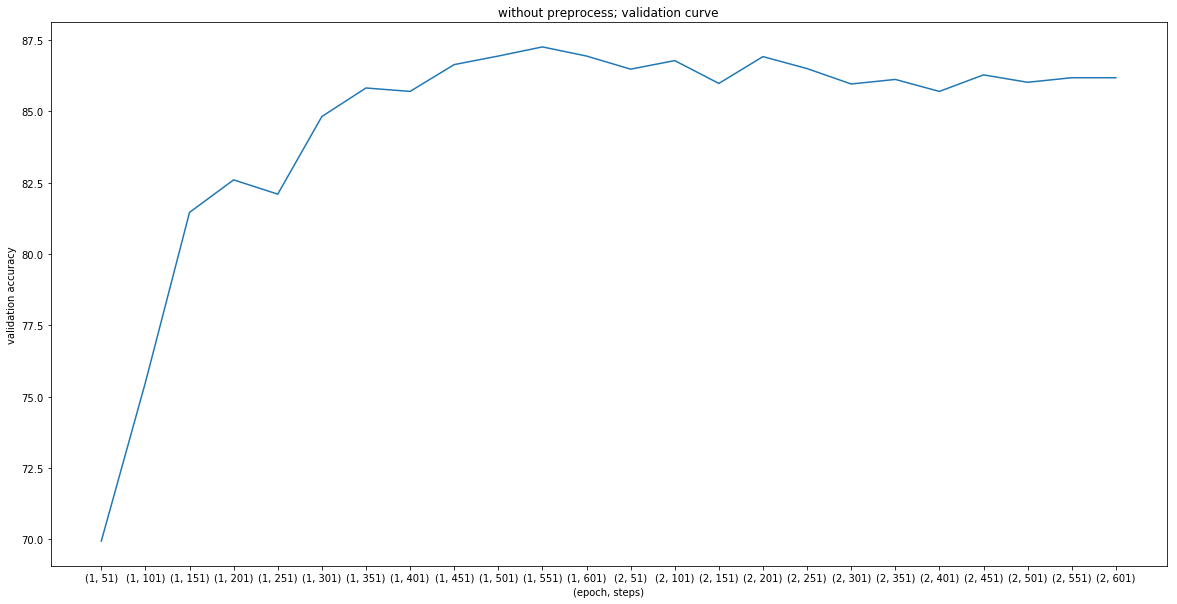

remove punctuation and html, lower case
Epoch: [1/2], Step: [51/625], trainning loss: 1.0168335127830506, Validation Acc: 57.96
Epoch: [1/2], Step: [101/625], trainning loss: 0.5652678006887436, Validation Acc: 77.98
Epoch: [1/2], Step: [151/625], trainning loss: 0.4743377849459648, Validation Acc: 81.86
Epoch: [1/2], Step: [201/625], trainning loss: 0.40564155399799345, Validation Acc: 83.72
Epoch: [1/2], Step: [251/625], trainning loss: 0.3722125273942947, Validation Acc: 85.76
Epoch: [1/2], Step: [301/625], trainning loss: 0.3680446222424507, Validation Acc: 86.64
Epoch: [1/2], Step: [351/625], trainning loss: 0.3167248722910881, Validation Acc: 86.94
Epoch: [1/2], Step: [401/625], trainning loss: 0.30790682941675185, Validation Acc: 87.18
Epoch: [1/2], Step: [451/625], trainning loss: 0.29841297686100005, Validation Acc: 86.56
Epoch: [1/2], Step: [501/625], trainning loss: 0.3012366333603859, Validation Acc: 87.12
Epoch: [1/2], Step: [551/625], trainning loss: 0.3011179465055466, V

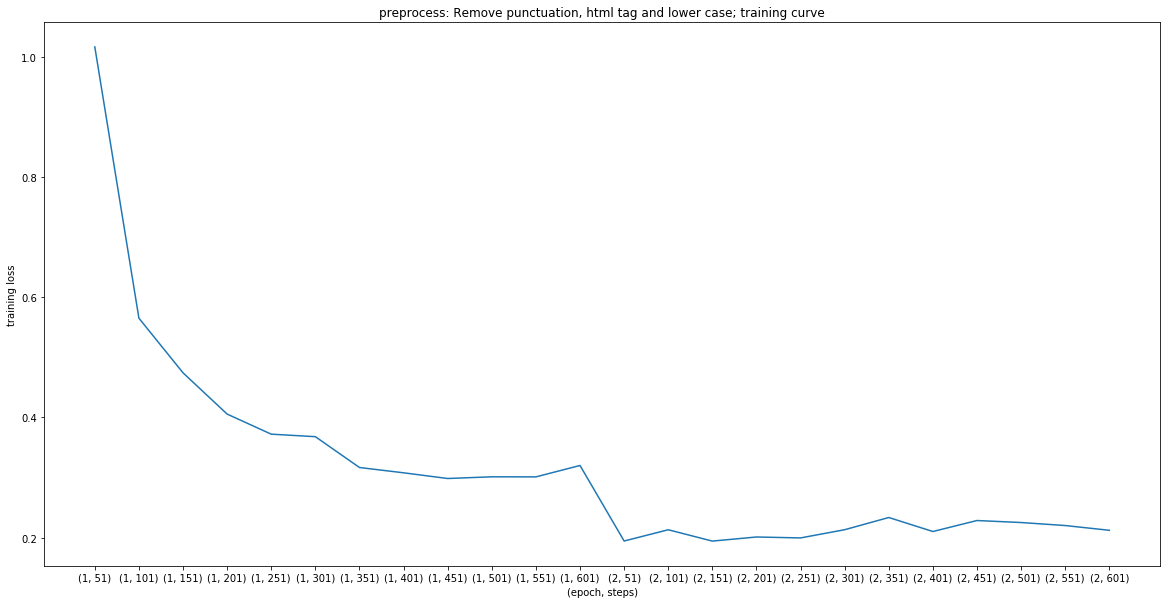

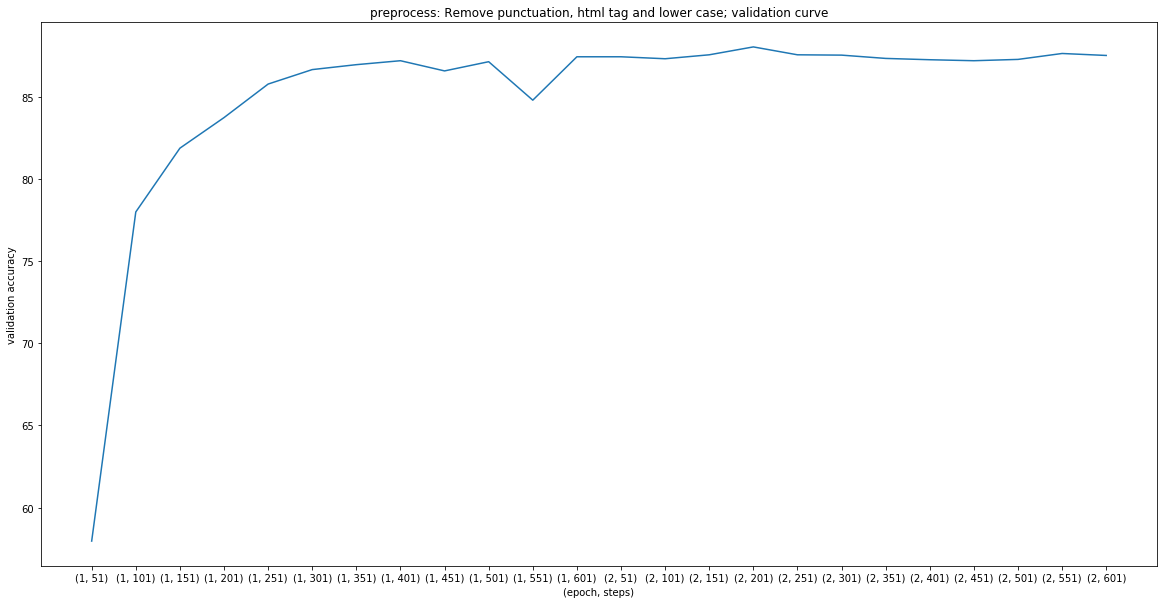

In [11]:
# set default
max_vocab_default = 10000
emb_dim_default = 100
lr_default = 0.01
num_epochs_default = 2
BATCH_SIZE = 32
n_gram_default = 1

# tune tokenization
print("Tune tokenization")
print("with post-processing")
token2id, id2token = build_vocab(n_gram_default, all_train_tokens,max_vocab_default)
train_data_indices = token2index_dataset(train_data_tokens,token2id)
val_data_indices = token2index_dataset(val_data_tokens, token2id)

# prepare data with dataloader for model
train_dataset = movieDataset(train_data_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=movie_collate_func,
                                       shuffle=True)

val_dataset = movieDataset(val_data_indices, val_target)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=movie_collate_func,
                                           shuffle=True)
# run
val_acc_i, train_loss, val_accuracy, epoch_list = run_model(emb_dim_default, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
print ("Val Acc {}".format(val_acc_i))

plt.figure(figsize=(20,10))
plt.plot(range(len(epoch_list)), train_loss)
plt.xticks(range(len(epoch_list)), epoch_list)
plt.xlabel("(epoch, steps)")
plt.ylabel("training loss")
plt.title("preprocess: Remove punctuation and lower case; training curve")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(range(len(epoch_list)), val_accuracy)
plt.xticks(range(len(epoch_list)), epoch_list)
plt.xlabel("(epoch, steps)")
plt.ylabel("validation accuracy")
plt.title("preprocess: Remove punctuation and lower case; validation curve")
plt.show()




print("without post-processing")
token2id, id2token = build_vocab(n_gram_default, all_train_tokens_raw,max_vocab_default,train_tokens=train_token_list_raw)
train_data_indices = token2index_dataset(train_data_tokens_raw,token2id)
val_data_indices = token2index_dataset(val_data_tokens_raw, token2id)

# prepare data with dataloader for model
train_dataset = movieDataset(train_data_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=movie_collate_func,
                                       shuffle=True)

val_dataset = movieDataset(val_data_indices, val_target)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=movie_collate_func,
                                           shuffle=True)

# run
val_acc_i, train_loss, val_accuracy, epoch_list = run_model(emb_dim_default, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
print ("Val Acc {}".format(val_acc_i))

plt.figure(figsize=(20,10))
plt.plot(range(len(epoch_list)), train_loss)
plt.xticks(range(len(epoch_list)), epoch_list)
plt.xlabel("(epoch, steps)")
plt.ylabel("training loss")
plt.title("without preprocess; training curve")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(range(len(epoch_list)), val_accuracy)
plt.xticks(range(len(epoch_list)), epoch_list)
plt.xlabel("(epoch, steps)")
plt.ylabel("validation accuracy")
plt.title("without preprocess; validation curve")
plt.show()




print("remove punctuation and html, lower case")
token2id, id2token = build_vocab(n_gram_default, all_train_tokens_nh, max_vocab_default,train_tokens=train_token_list_nh)
train_data_indices = token2index_dataset(train_data_tokens_nh,token2id)
val_data_indices = token2index_dataset(val_data_tokens_nh, token2id)

# prepare data with dataloader for model
train_dataset = movieDataset(train_data_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=movie_collate_func,
                                       shuffle=True)

val_dataset = movieDataset(val_data_indices, val_target)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=movie_collate_func,
                                           shuffle=True)

# run
val_acc_i, train_loss, val_accuracy, epoch_list = run_model(emb_dim_default, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
print ("Val Acc {}".format(val_acc_i))

plt.figure(figsize=(20,10))
plt.plot(range(len(epoch_list)), train_loss)
plt.xticks(range(len(epoch_list)), epoch_list)
plt.xlabel("(epoch, steps)")
plt.ylabel("training loss")
plt.title("preprocess: Remove punctuation, html tag and lower case; training curve")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(range(len(epoch_list)), val_accuracy)
plt.xticks(range(len(epoch_list)), epoch_list)
plt.xlabel("(epoch, steps)")
plt.ylabel("validation accuracy")
plt.title("preprocess: Remove punctuation, html tag and lower case; validation curve")
plt.show()



Epoch: [1/2], Step: [51/625], trainning loss: 1.0093369841575623, Validation Acc: 62.64
Epoch: [1/2], Step: [101/625], trainning loss: 0.6140338504314422, Validation Acc: 73.88
Epoch: [1/2], Step: [151/625], trainning loss: 0.5290799349546432, Validation Acc: 77.72
Epoch: [1/2], Step: [201/625], trainning loss: 0.4727086788415909, Validation Acc: 82.42
Epoch: [1/2], Step: [251/625], trainning loss: 0.43184903979301453, Validation Acc: 83.24
Epoch: [1/2], Step: [301/625], trainning loss: 0.39111510664224625, Validation Acc: 83.08
Epoch: [1/2], Step: [351/625], trainning loss: 0.38470700711011885, Validation Acc: 82.06
Epoch: [1/2], Step: [401/625], trainning loss: 0.38898027658462525, Validation Acc: 83.82
Epoch: [1/2], Step: [451/625], trainning loss: 0.36655987828969955, Validation Acc: 84.2
Epoch: [1/2], Step: [501/625], trainning loss: 0.38168409049510954, Validation Acc: 84.22
Epoch: [1/2], Step: [551/625], trainning loss: 0.38253189146518707, Validation Acc: 84.0
Epoch: [1/2], Ste

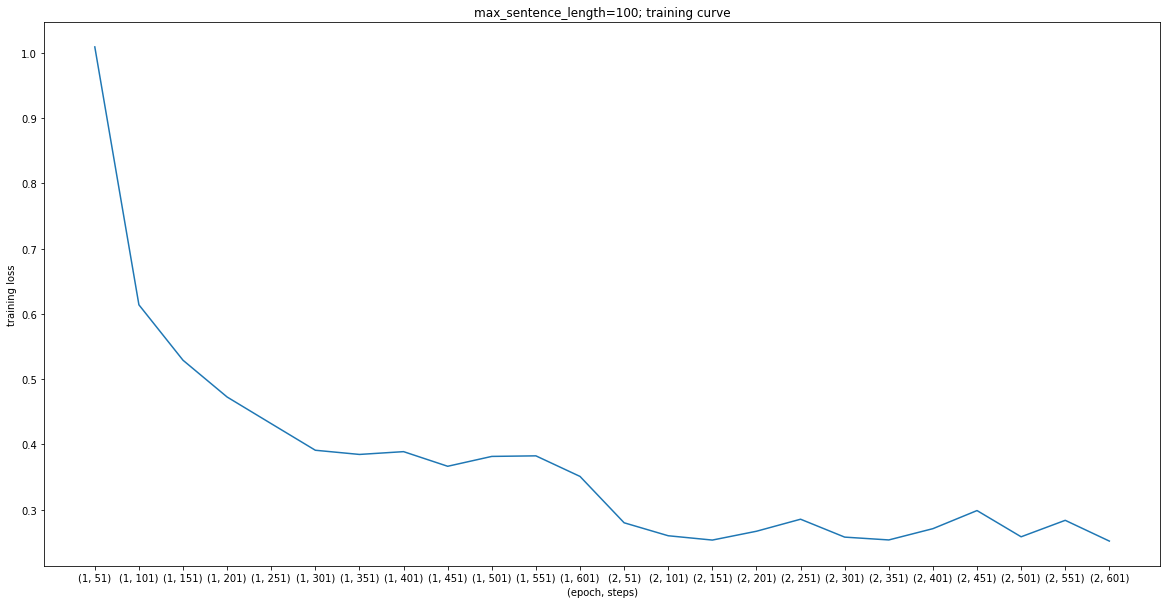

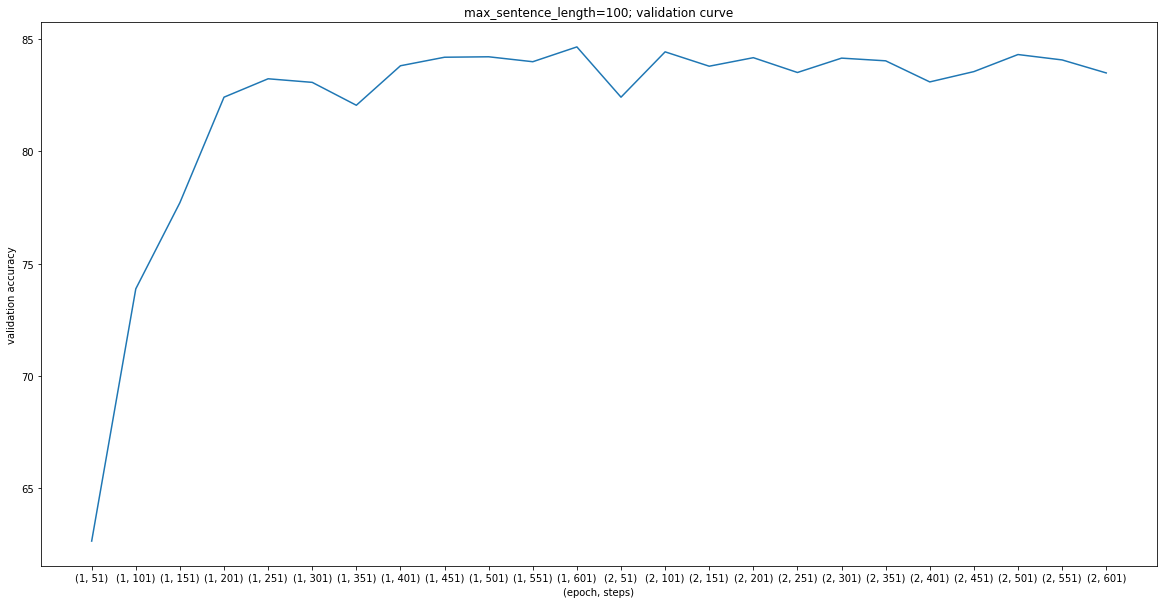

Epoch: [1/2], Step: [51/625], trainning loss: 1.054056590795517, Validation Acc: 67.54
Epoch: [1/2], Step: [101/625], trainning loss: 0.5794878250360489, Validation Acc: 77.18
Epoch: [1/2], Step: [151/625], trainning loss: 0.45610905200242996, Validation Acc: 83.94
Epoch: [1/2], Step: [201/625], trainning loss: 0.3960633048415184, Validation Acc: 84.08
Epoch: [1/2], Step: [251/625], trainning loss: 0.36428710728883745, Validation Acc: 86.48
Epoch: [1/2], Step: [301/625], trainning loss: 0.3562584906816483, Validation Acc: 87.12
Epoch: [1/2], Step: [351/625], trainning loss: 0.3105731052160263, Validation Acc: 87.2
Epoch: [1/2], Step: [401/625], trainning loss: 0.29277109533548357, Validation Acc: 87.16
Epoch: [1/2], Step: [451/625], trainning loss: 0.3333718049526215, Validation Acc: 87.5
Epoch: [1/2], Step: [501/625], trainning loss: 0.2948081454634666, Validation Acc: 87.6
Epoch: [1/2], Step: [551/625], trainning loss: 0.30892840564250945, Validation Acc: 87.86
Epoch: [1/2], Step: [6

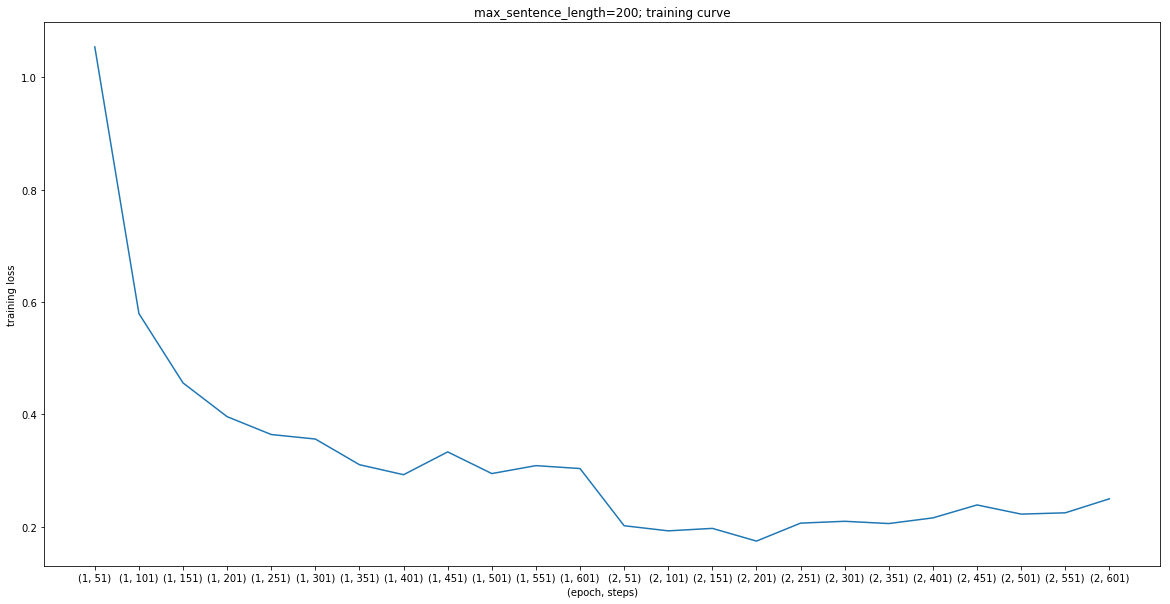

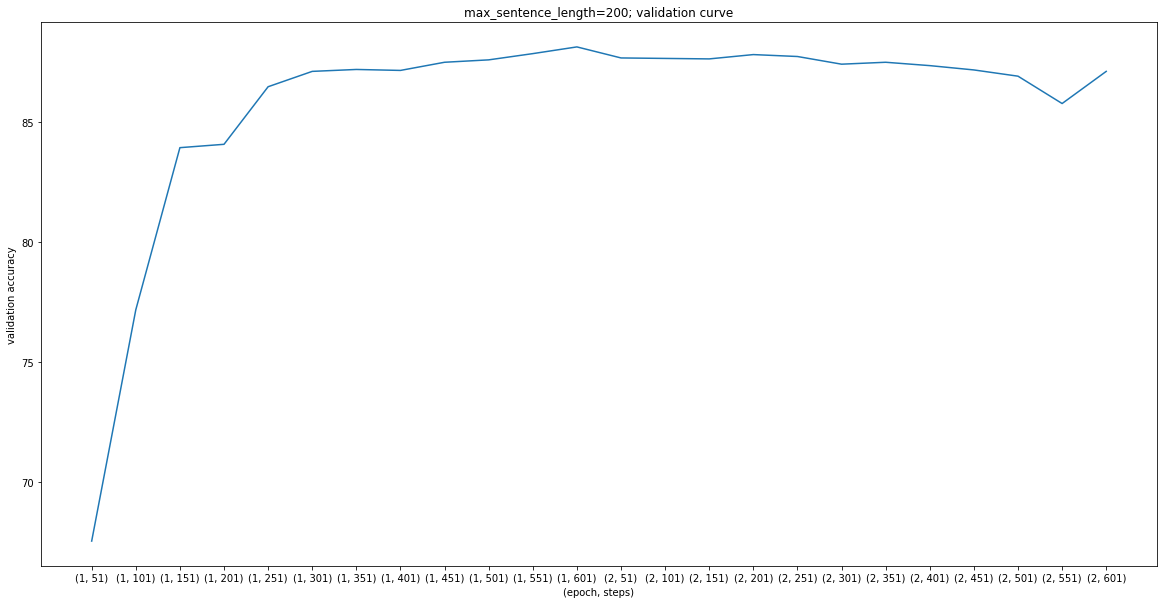

Epoch: [1/2], Step: [51/625], trainning loss: 1.0328401291370393, Validation Acc: 52.38
Epoch: [1/2], Step: [101/625], trainning loss: 0.5723205775022506, Validation Acc: 78.18
Epoch: [1/2], Step: [151/625], trainning loss: 0.439533576965332, Validation Acc: 83.98
Epoch: [1/2], Step: [201/625], trainning loss: 0.3428418353199959, Validation Acc: 86.82
Epoch: [1/2], Step: [251/625], trainning loss: 0.3131631568074226, Validation Acc: 87.8
Epoch: [1/2], Step: [301/625], trainning loss: 0.2938417878746986, Validation Acc: 88.1
Epoch: [1/2], Step: [351/625], trainning loss: 0.3094204840064049, Validation Acc: 87.58
Epoch: [1/2], Step: [401/625], trainning loss: 0.29794708475470544, Validation Acc: 88.34
Epoch: [1/2], Step: [451/625], trainning loss: 0.29934877529740334, Validation Acc: 89.48
Epoch: [1/2], Step: [501/625], trainning loss: 0.32839939385652545, Validation Acc: 89.3
Epoch: [1/2], Step: [551/625], trainning loss: 0.25675593376159667, Validation Acc: 89.64
Epoch: [1/2], Step: [6

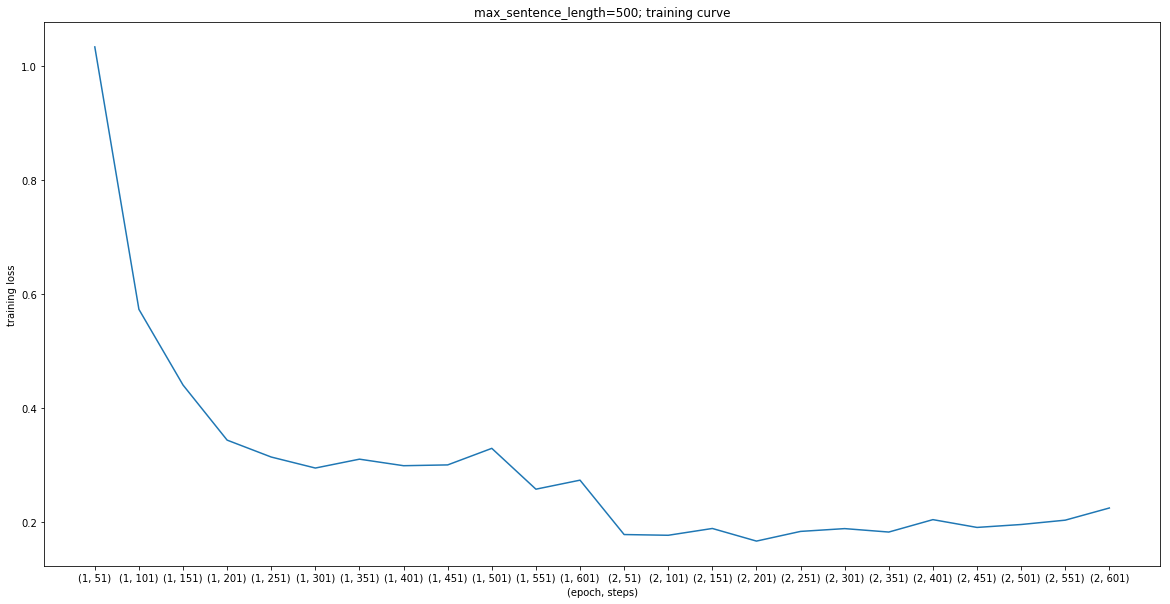

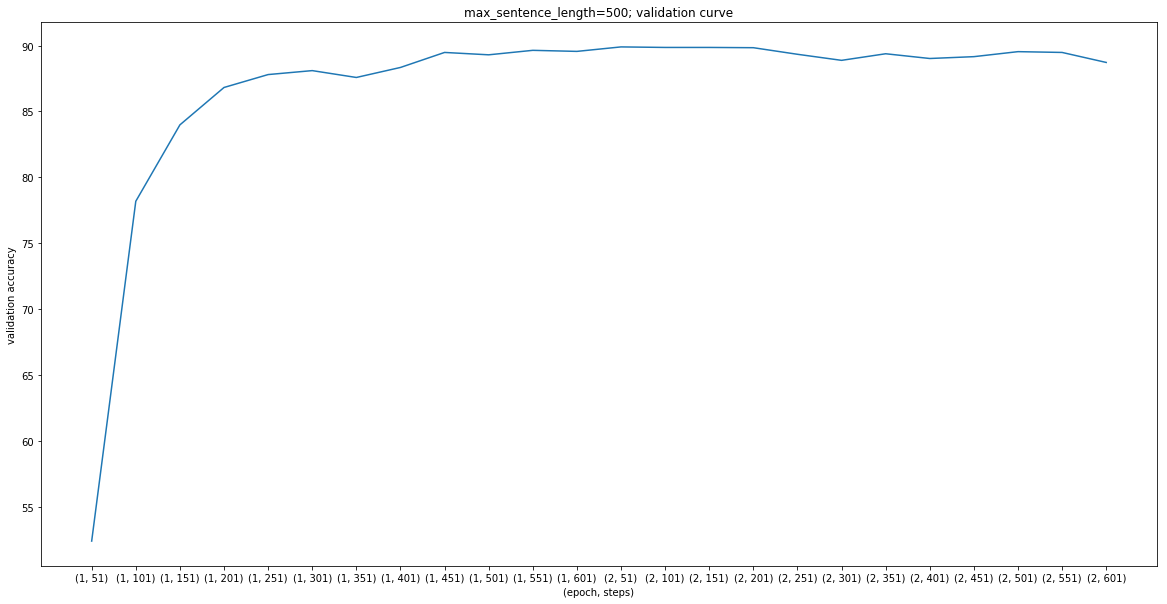

Epoch: [1/2], Step: [51/625], trainning loss: 1.0126609194278717, Validation Acc: 72.7
Epoch: [1/2], Step: [101/625], trainning loss: 0.5648850232362748, Validation Acc: 81.2
Epoch: [1/2], Step: [151/625], trainning loss: 0.4349259626865387, Validation Acc: 86.26
Epoch: [1/2], Step: [201/625], trainning loss: 0.37288371235132217, Validation Acc: 87.26
Epoch: [1/2], Step: [251/625], trainning loss: 0.327228299677372, Validation Acc: 87.44
Epoch: [1/2], Step: [301/625], trainning loss: 0.3223883533477783, Validation Acc: 87.5
Epoch: [1/2], Step: [351/625], trainning loss: 0.2950426623225212, Validation Acc: 88.44
Epoch: [1/2], Step: [401/625], trainning loss: 0.2802770021557808, Validation Acc: 88.5
Epoch: [1/2], Step: [451/625], trainning loss: 0.2812697884440422, Validation Acc: 89.92
Epoch: [1/2], Step: [501/625], trainning loss: 0.2505986174941063, Validation Acc: 90.12
Epoch: [1/2], Step: [551/625], trainning loss: 0.2545711472630501, Validation Acc: 90.12
Epoch: [1/2], Step: [601/6

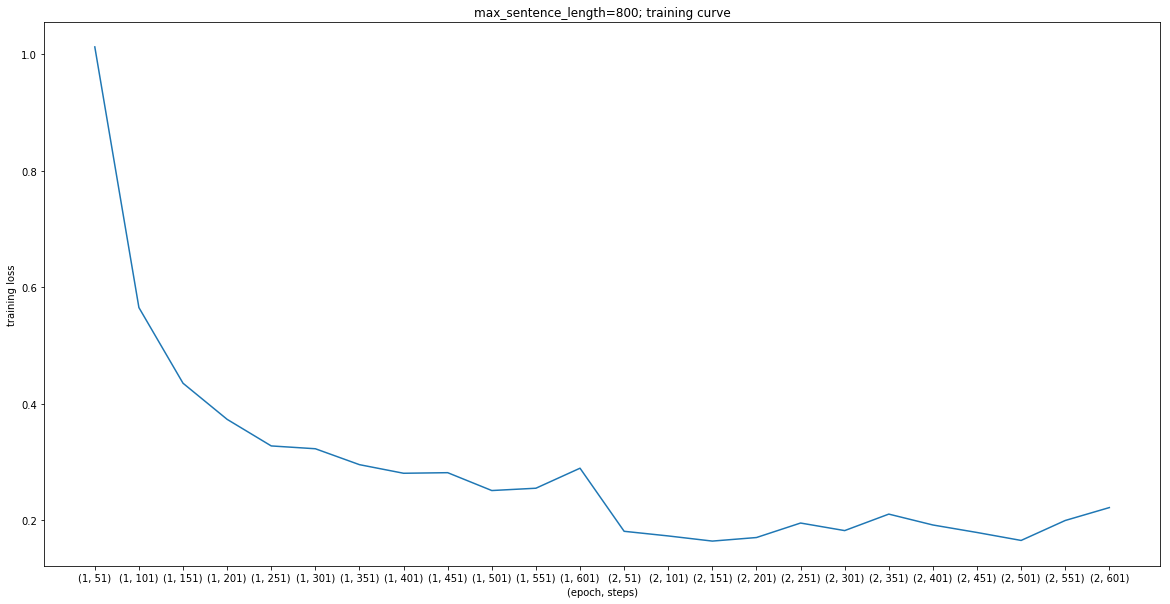

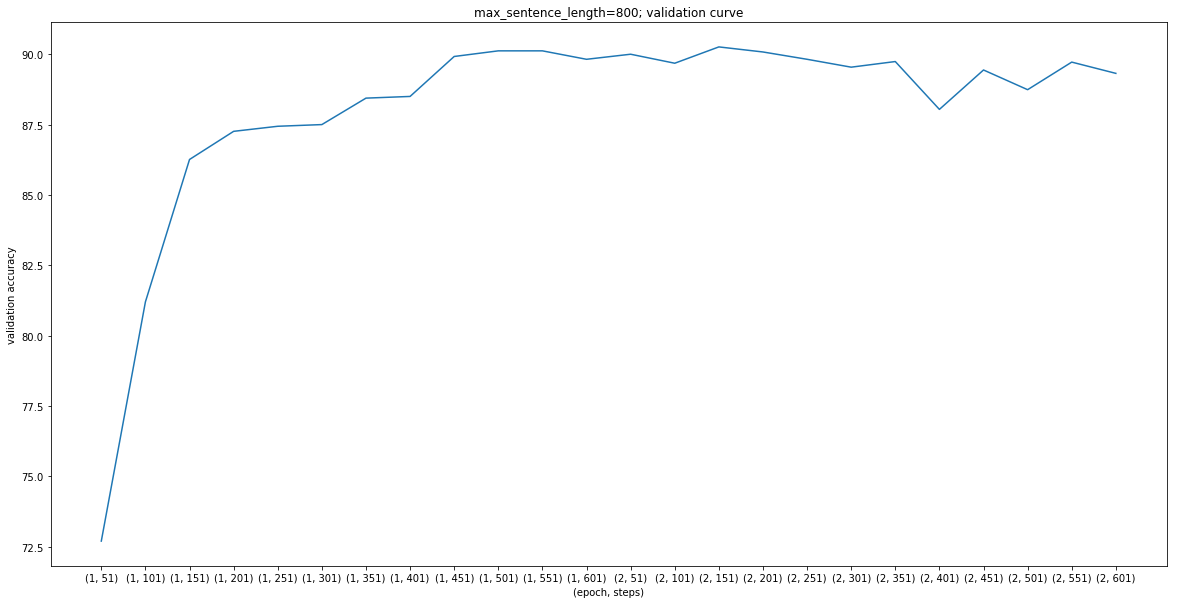

Epoch: [1/2], Step: [51/625], trainning loss: 1.0000686526298523, Validation Acc: 63.7
Epoch: [1/2], Step: [101/625], trainning loss: 0.5935286068916321, Validation Acc: 79.8
Epoch: [1/2], Step: [151/625], trainning loss: 0.450391429066658, Validation Acc: 85.18
Epoch: [1/2], Step: [201/625], trainning loss: 0.3535850504040718, Validation Acc: 87.14
Epoch: [1/2], Step: [251/625], trainning loss: 0.30979200959205627, Validation Acc: 88.04
Epoch: [1/2], Step: [301/625], trainning loss: 0.30335199415683745, Validation Acc: 85.34
Epoch: [1/2], Step: [351/625], trainning loss: 0.28405074685812, Validation Acc: 89.4
Epoch: [1/2], Step: [401/625], trainning loss: 0.2637752604484558, Validation Acc: 86.58
Epoch: [1/2], Step: [451/625], trainning loss: 0.30238781481981275, Validation Acc: 89.62
Epoch: [1/2], Step: [501/625], trainning loss: 0.28692934185266494, Validation Acc: 89.92
Epoch: [1/2], Step: [551/625], trainning loss: 0.28509094327688217, Validation Acc: 89.66
Epoch: [1/2], Step: [60

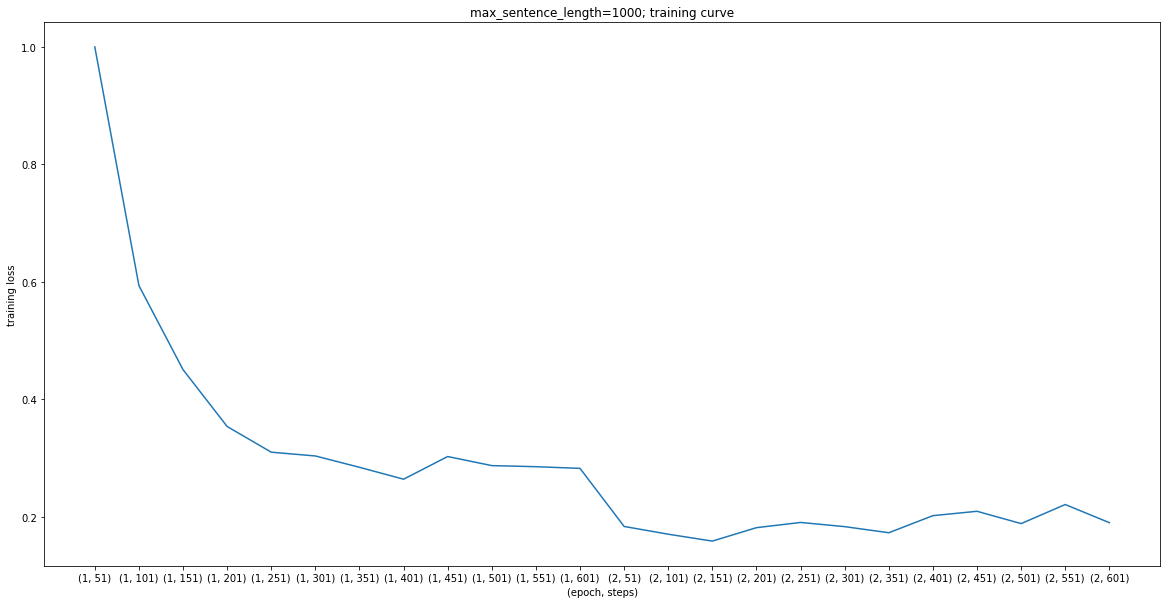

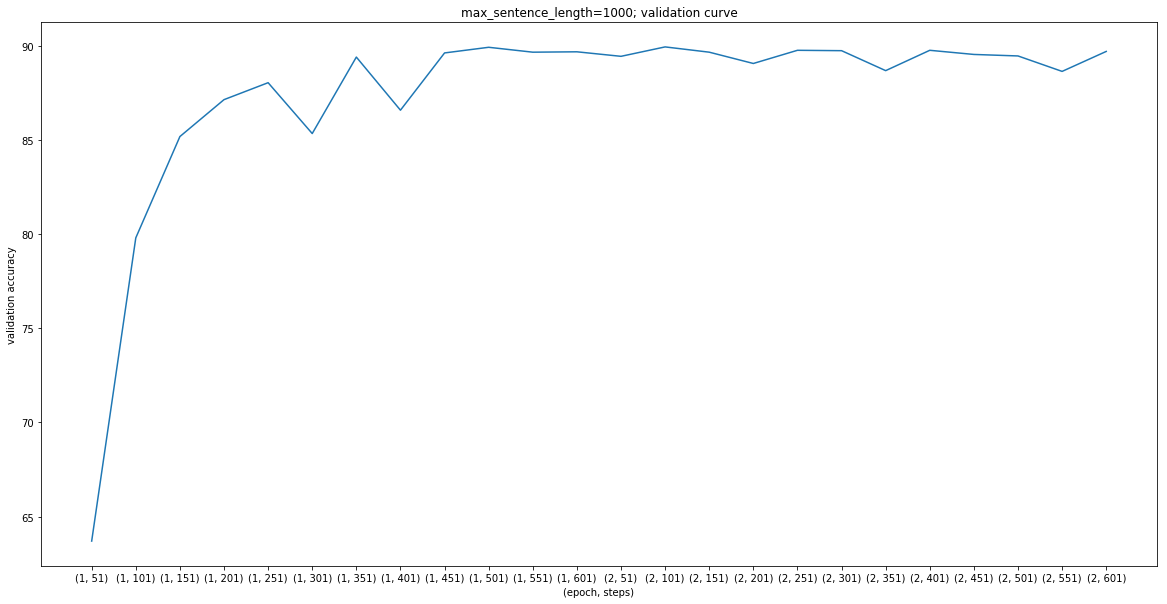

In [34]:
# since by removing html tag, we have the best validation accuracy, we will use nh datasets from now on
def tune_max_sentence_length(n_msl):
    max_val_acc = -1
    best_msl = -1
    
    token2id, id2token = build_vocab(n_gram_default, all_train_tokens_nh, max_vocab_default,train_tokens=train_token_list_nh)
    train_data_indices = token2index_dataset(train_data_tokens_nh,token2id)
    val_data_indices = token2index_dataset(val_data_tokens_nh, token2id)

    for msl in n_msl:
        # prepare data with dataloader for model
        cl_func = (lambda b: movie_collate_func(batch=b, max_sentence_length=msl))
        train_dataset = movieDataset(train_data_indices, train_target,max_sentence_length=msl)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=cl_func,
                                               shuffle=True)

        val_dataset = movieDataset(val_data_indices, val_target, max_sentence_length=msl)
        val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                                   batch_size=BATCH_SIZE,
                                                   collate_fn=cl_func,
                                                   shuffle=True)
        
        # run
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(emb_dim_default, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
        print ("Val Acc {}".format(val_acc_i))

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.title("max_sentence_length="+str(msl)+"; training curve")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.title("max_sentence_length="+str(msl)+"; validation curve")
        plt.show()
        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_msl = msl
            
    return best_msl
best_msl = tune_max_sentence_length([100,200,500,800, 1000])

In [35]:
best_msl 

800

Tuning n-gram:
n-gram:  1
Epoch: [1/2], Step: [51/625], trainning loss: 1.0435985434055328, Validation Acc: 59.34
Epoch: [1/2], Step: [101/625], trainning loss: 0.564802588224411, Validation Acc: 78.48
Epoch: [1/2], Step: [151/625], trainning loss: 0.4531063002347946, Validation Acc: 85.12
Epoch: [1/2], Step: [201/625], trainning loss: 0.34434580415487287, Validation Acc: 87.0
Epoch: [1/2], Step: [251/625], trainning loss: 0.3218665713071823, Validation Acc: 87.14
Epoch: [1/2], Step: [301/625], trainning loss: 0.31391732454299925, Validation Acc: 88.84
Epoch: [1/2], Step: [351/625], trainning loss: 0.2837956759333611, Validation Acc: 89.12
Epoch: [1/2], Step: [401/625], trainning loss: 0.2909871622920036, Validation Acc: 89.68
Epoch: [1/2], Step: [451/625], trainning loss: 0.2566931013762951, Validation Acc: 88.32
Epoch: [1/2], Step: [501/625], trainning loss: 0.27501796126365663, Validation Acc: 90.26
Epoch: [1/2], Step: [551/625], trainning loss: 0.2930794960260391, Validation Acc: 8

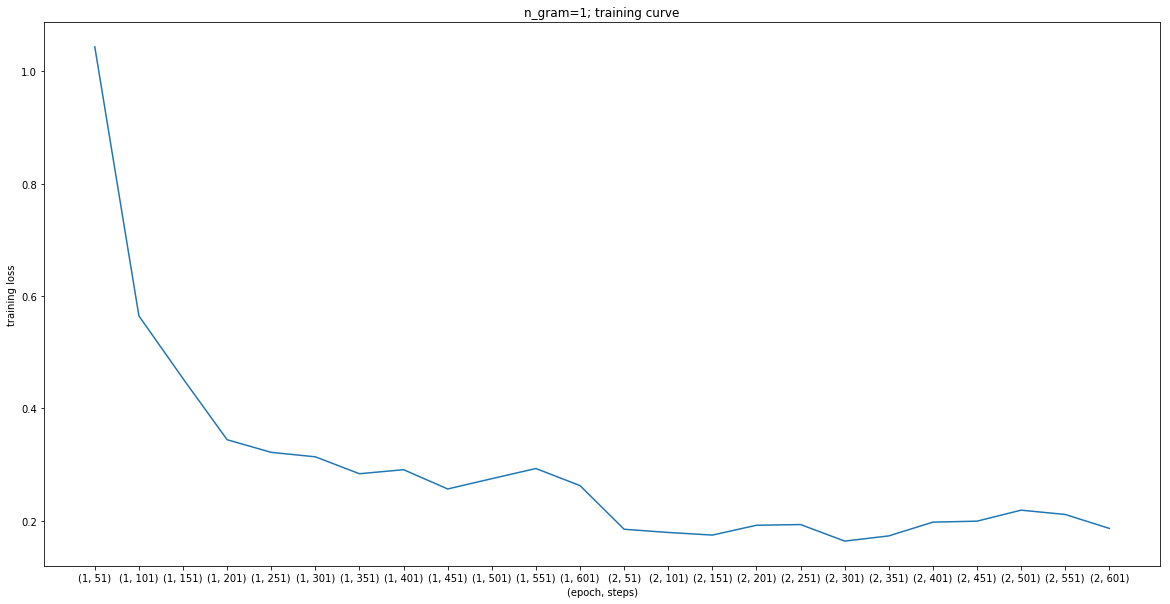

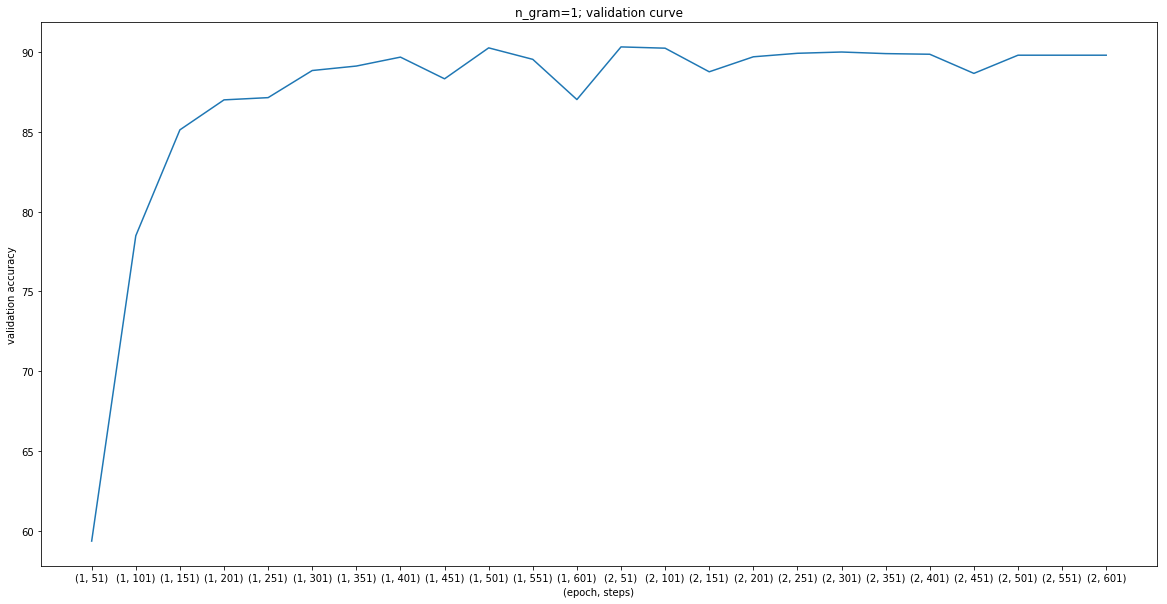

n-gram:  2
Epoch: [1/2], Step: [51/625], trainning loss: 0.8649717831611633, Validation Acc: 76.3
Epoch: [1/2], Step: [101/625], trainning loss: 0.6225162243843079, Validation Acc: 78.96
Epoch: [1/2], Step: [151/625], trainning loss: 0.4830263048410416, Validation Acc: 82.88
Epoch: [1/2], Step: [201/625], trainning loss: 0.3736088758707046, Validation Acc: 85.88
Epoch: [1/2], Step: [251/625], trainning loss: 0.34750496089458466, Validation Acc: 87.74
Epoch: [1/2], Step: [301/625], trainning loss: 0.3217302975058556, Validation Acc: 88.06
Epoch: [1/2], Step: [351/625], trainning loss: 0.30162563413381577, Validation Acc: 87.14
Epoch: [1/2], Step: [401/625], trainning loss: 0.32444475919008253, Validation Acc: 89.26
Epoch: [1/2], Step: [451/625], trainning loss: 0.3027041032910347, Validation Acc: 89.34
Epoch: [1/2], Step: [501/625], trainning loss: 0.2510366412997246, Validation Acc: 89.44
Epoch: [1/2], Step: [551/625], trainning loss: 0.2863458961248398, Validation Acc: 89.54
Epoch: [1

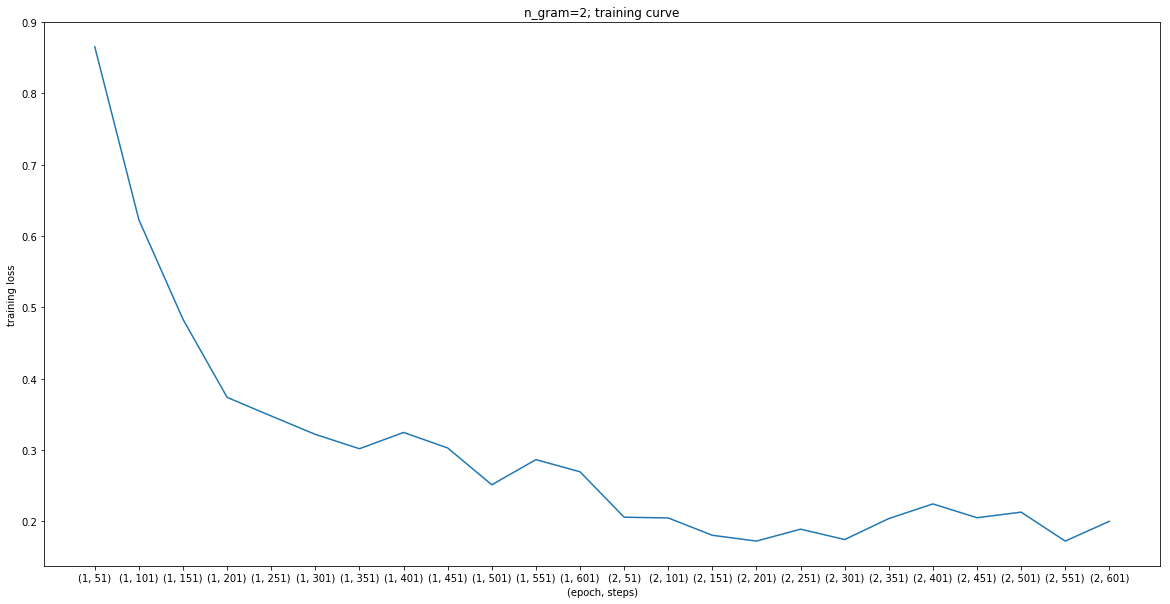

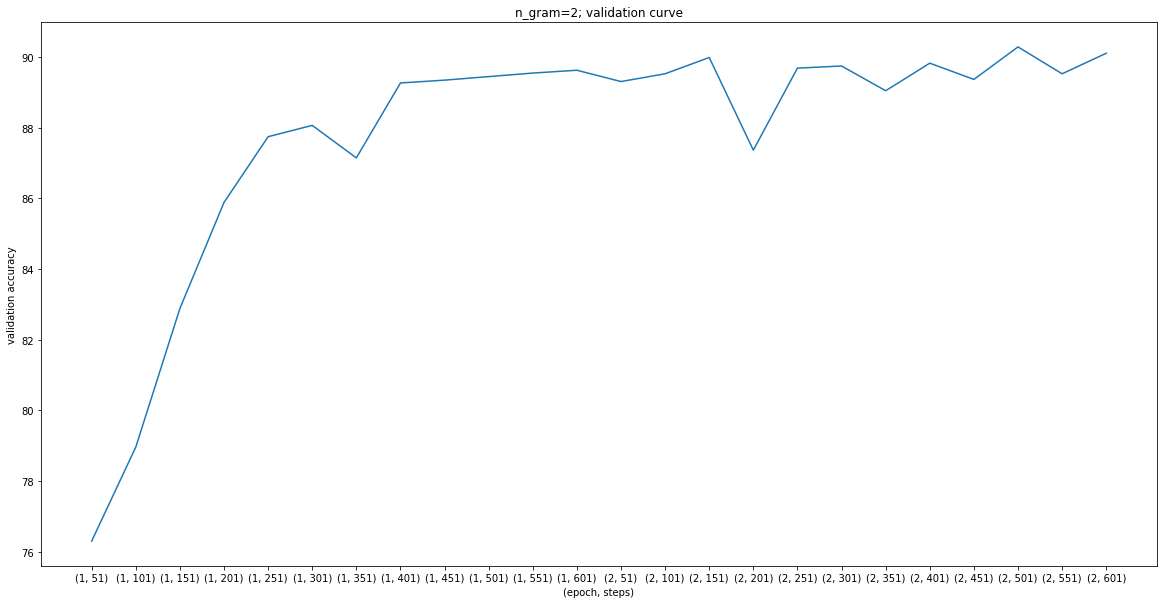

n-gram:  3
Epoch: [1/2], Step: [51/625], trainning loss: 0.848260167837143, Validation Acc: 54.7
Epoch: [1/2], Step: [101/625], trainning loss: 0.6426672005653381, Validation Acc: 80.74
Epoch: [1/2], Step: [151/625], trainning loss: 0.5139810574054718, Validation Acc: 76.7
Epoch: [1/2], Step: [201/625], trainning loss: 0.42246527373790743, Validation Acc: 83.52
Epoch: [1/2], Step: [251/625], trainning loss: 0.3594144281744957, Validation Acc: 86.72
Epoch: [1/2], Step: [301/625], trainning loss: 0.32955304890871046, Validation Acc: 87.68
Epoch: [1/2], Step: [351/625], trainning loss: 0.3195626938343048, Validation Acc: 85.2
Epoch: [1/2], Step: [401/625], trainning loss: 0.33070609748363494, Validation Acc: 88.12
Epoch: [1/2], Step: [451/625], trainning loss: 0.2940340703725815, Validation Acc: 88.84
Epoch: [1/2], Step: [501/625], trainning loss: 0.2781561970710754, Validation Acc: 88.8
Epoch: [1/2], Step: [551/625], trainning loss: 0.28715084612369535, Validation Acc: 89.14
Epoch: [1/2]

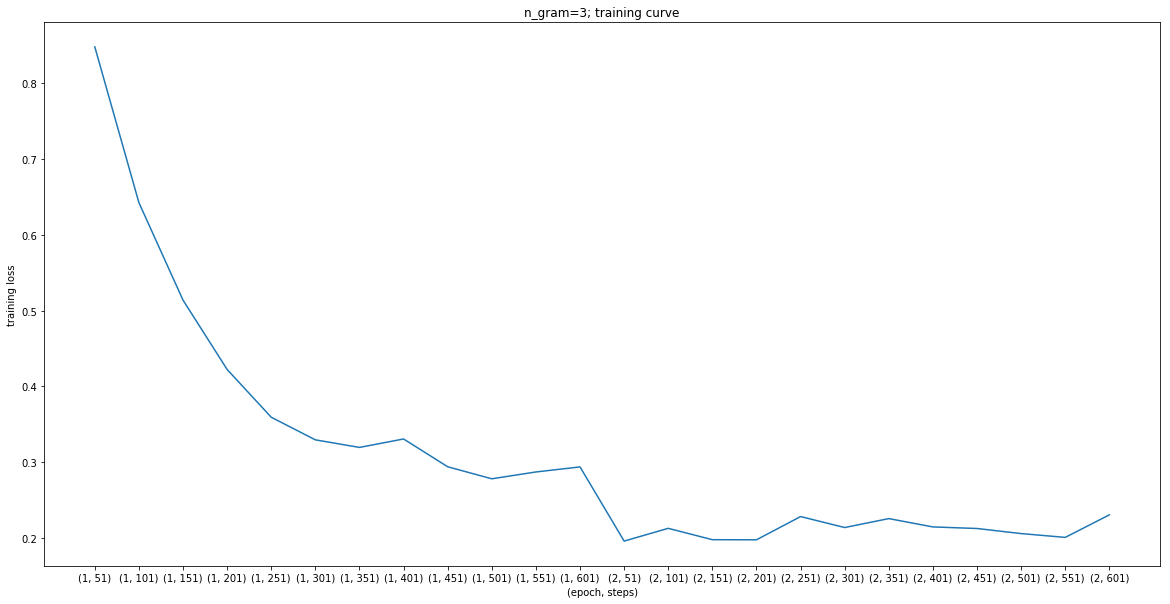

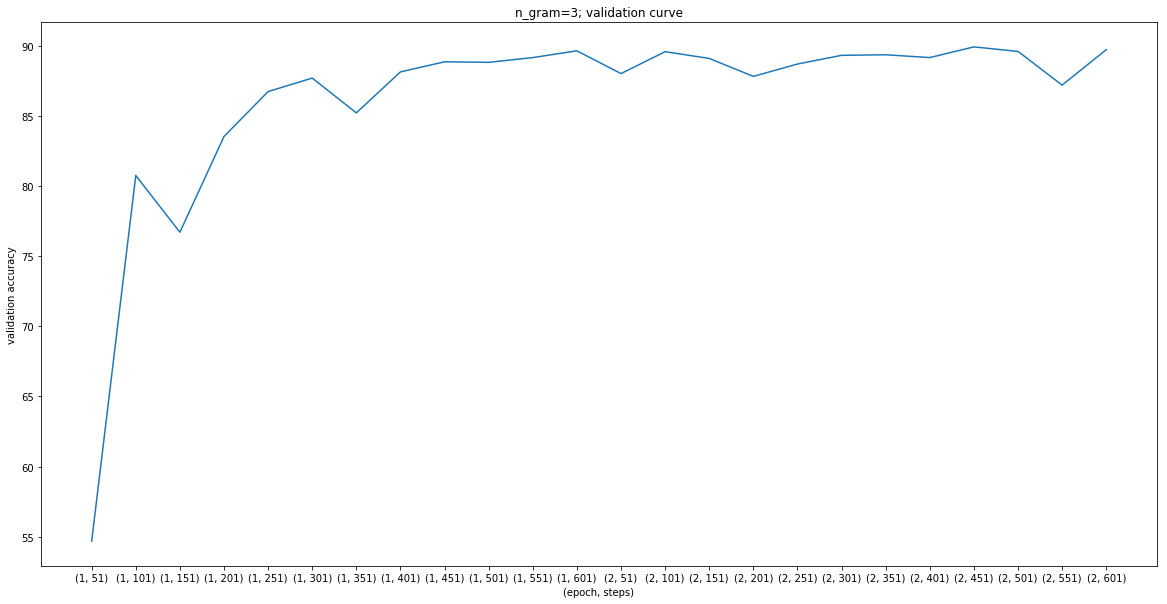

n-gram:  4
Epoch: [1/2], Step: [51/625], trainning loss: 0.8484449636936188, Validation Acc: 50.1
Epoch: [1/2], Step: [101/625], trainning loss: 0.6797150635719299, Validation Acc: 71.86
Epoch: [1/2], Step: [151/625], trainning loss: 0.5637530779838562, Validation Acc: 69.82
Epoch: [1/2], Step: [201/625], trainning loss: 0.4753368616104126, Validation Acc: 82.62
Epoch: [1/2], Step: [251/625], trainning loss: 0.4089855462312698, Validation Acc: 85.78
Epoch: [1/2], Step: [301/625], trainning loss: 0.38131133913993837, Validation Acc: 86.64
Epoch: [1/2], Step: [351/625], trainning loss: 0.35172509878873826, Validation Acc: 85.3
Epoch: [1/2], Step: [401/625], trainning loss: 0.32708522319793704, Validation Acc: 87.58
Epoch: [1/2], Step: [451/625], trainning loss: 0.29980424731969835, Validation Acc: 88.52
Epoch: [1/2], Step: [501/625], trainning loss: 0.32257758677005766, Validation Acc: 88.82
Epoch: [1/2], Step: [551/625], trainning loss: 0.29972480893135073, Validation Acc: 85.3
Epoch: [

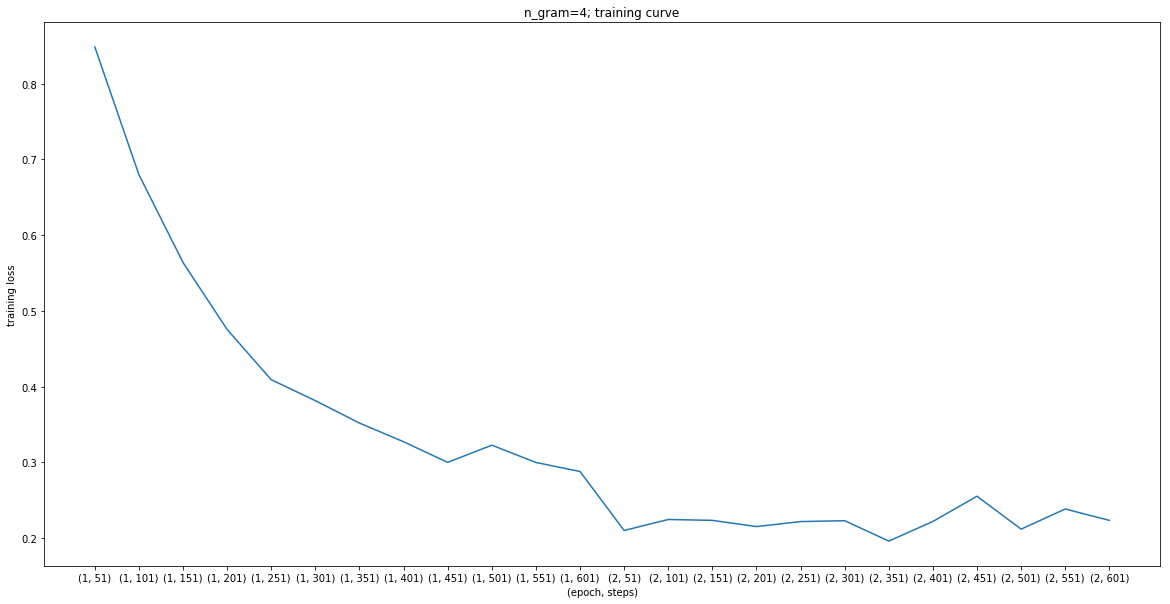

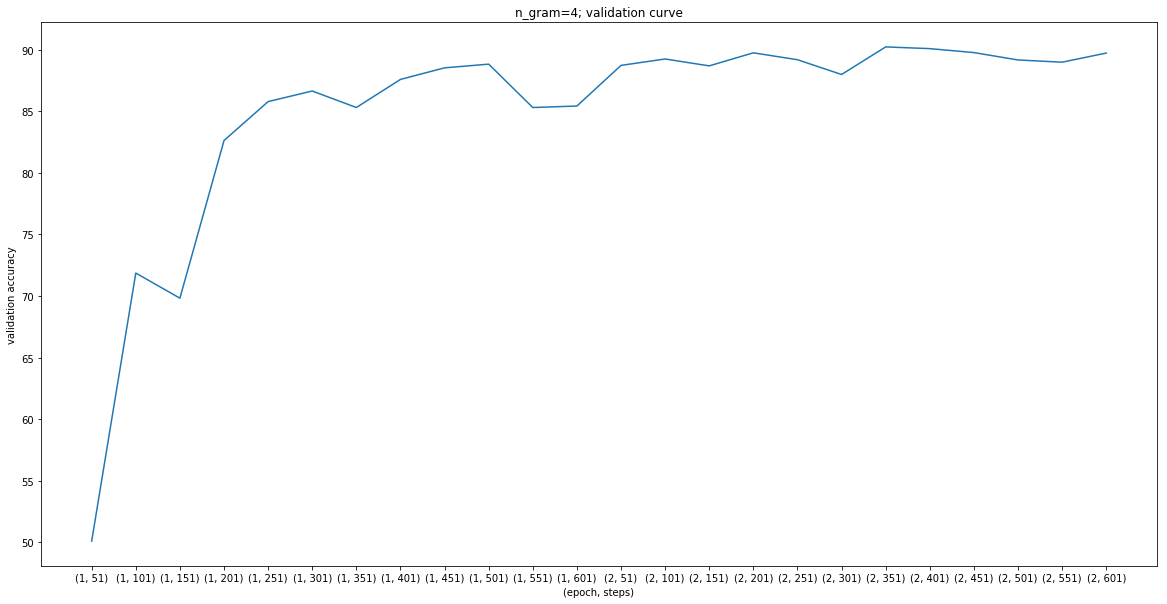

In [40]:
# tune n-gram with post-processing since having better result compare to without post-processing with all other parameters fixed
def tune_n_gram(n_size):   
    
    new_train = []
    new_val = []
    max_val_acc = -1
    best_n = -1
    train_size = len(train_data_tokens)
    val_size = len(val_data_tokens)
    
    # tune n-gram
    print("Tuning n-gram:")
    for n_i in range(1,n_size+1):
        # build vocab
        token2id, id2token = build_vocab(n_i, all_train_tokens_nh,max_vocab_default,train_tokens=train_token_list_nh)
        if n_i == 1:
            new_train = copy.deepcopy(train_data_tokens_nh)
            new_val = copy.deepcopy(val_data_tokens_nh)
        else:
            for idx in range(train_size):
                new_train[idx] += train_token_list_nh[n_i-2][idx]
            for idx in range(val_size):
                new_val[idx] += val_token_list_nh[n_i -2][idx]
        
        #print(new_train[0])
        #print(train_data_tokens[0])
        # get indices
        train_data_indices = token2index_dataset(new_train,token2id)
        val_data_indices = token2index_dataset(new_val, token2id)
        
        # prepare data with dataloader for model
        train_dataset = movieDataset(train_data_indices, train_target,max_sentence_length=best_msl)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=lambda b: movie_collate_func(b, best_msl),
                                               shuffle=True)
        
        val_dataset = movieDataset(val_data_indices, val_target, max_sentence_length=best_msl)
        val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                                   batch_size=BATCH_SIZE,
                                                   collate_fn=lambda b: movie_collate_func(b, best_msl),
                                                   shuffle=True)
                
        # run
        print("n-gram: ", n_i)        
        
        val_acc_i, train_loss, val_accuracy, epoch_list= run_model(emb_dim_default, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
        print ("Max val Acc {}".format(val_acc_i))
        
        # plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.title("n_gram="+str(n_i)+"; training curve")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.title("n_gram="+str(n_i)+"; validation curve")
        plt.show()

        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_n = n_i
            
    return best_n

best_n = tune_n_gram(4)

In [41]:
best_n

1

current max vocab size:  10000
Epoch: [1/2], Step: [51/625], trainning loss: 0.9839081048965455, Validation Acc: 59.4
Epoch: [1/2], Step: [101/625], trainning loss: 0.591166478395462, Validation Acc: 66.24
Epoch: [1/2], Step: [151/625], trainning loss: 0.4351912295818329, Validation Acc: 84.6
Epoch: [1/2], Step: [201/625], trainning loss: 0.36456152468919756, Validation Acc: 86.02
Epoch: [1/2], Step: [251/625], trainning loss: 0.3298189169168472, Validation Acc: 88.52
Epoch: [1/2], Step: [301/625], trainning loss: 0.3162688821554184, Validation Acc: 88.76
Epoch: [1/2], Step: [351/625], trainning loss: 0.27947010189294813, Validation Acc: 89.32
Epoch: [1/2], Step: [401/625], trainning loss: 0.27834209203720095, Validation Acc: 89.32
Epoch: [1/2], Step: [451/625], trainning loss: 0.29810588389635084, Validation Acc: 88.84
Epoch: [1/2], Step: [501/625], trainning loss: 0.27475825309753416, Validation Acc: 89.72
Epoch: [1/2], Step: [551/625], trainning loss: 0.27654611200094226, Validation

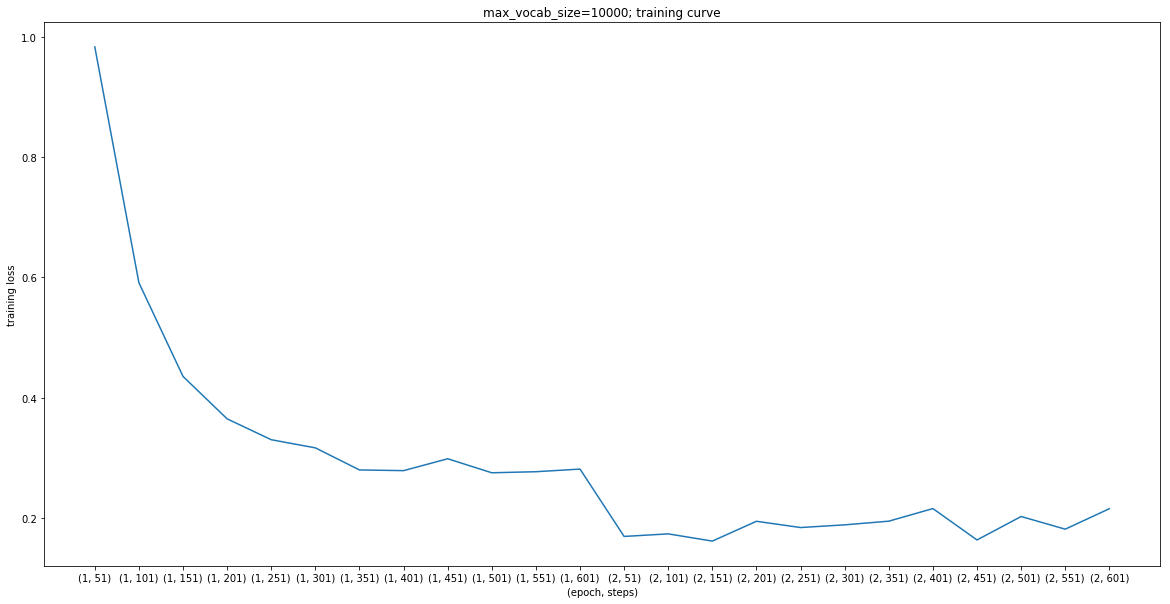

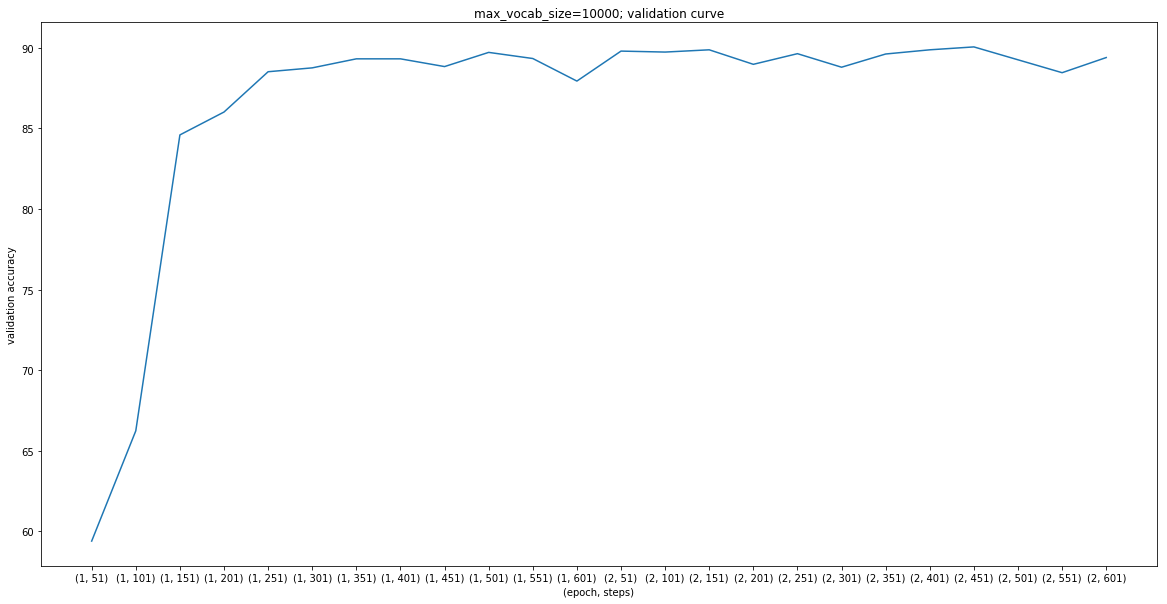

current max vocab size:  20000
Epoch: [1/2], Step: [51/625], trainning loss: 1.0194160914421082, Validation Acc: 57.56
Epoch: [1/2], Step: [101/625], trainning loss: 0.5545509696006775, Validation Acc: 78.48
Epoch: [1/2], Step: [151/625], trainning loss: 0.4094760888814926, Validation Acc: 85.68
Epoch: [1/2], Step: [201/625], trainning loss: 0.35364695370197297, Validation Acc: 86.94
Epoch: [1/2], Step: [251/625], trainning loss: 0.32058178275823596, Validation Acc: 88.38
Epoch: [1/2], Step: [301/625], trainning loss: 0.2850892809033394, Validation Acc: 88.96
Epoch: [1/2], Step: [351/625], trainning loss: 0.2928642994165421, Validation Acc: 89.1
Epoch: [1/2], Step: [401/625], trainning loss: 0.26213398545980454, Validation Acc: 89.42
Epoch: [1/2], Step: [451/625], trainning loss: 0.2810645577311516, Validation Acc: 88.9
Epoch: [1/2], Step: [501/625], trainning loss: 0.250166018307209, Validation Acc: 90.02
Epoch: [1/2], Step: [551/625], trainning loss: 0.2596965602040291, Validation Ac

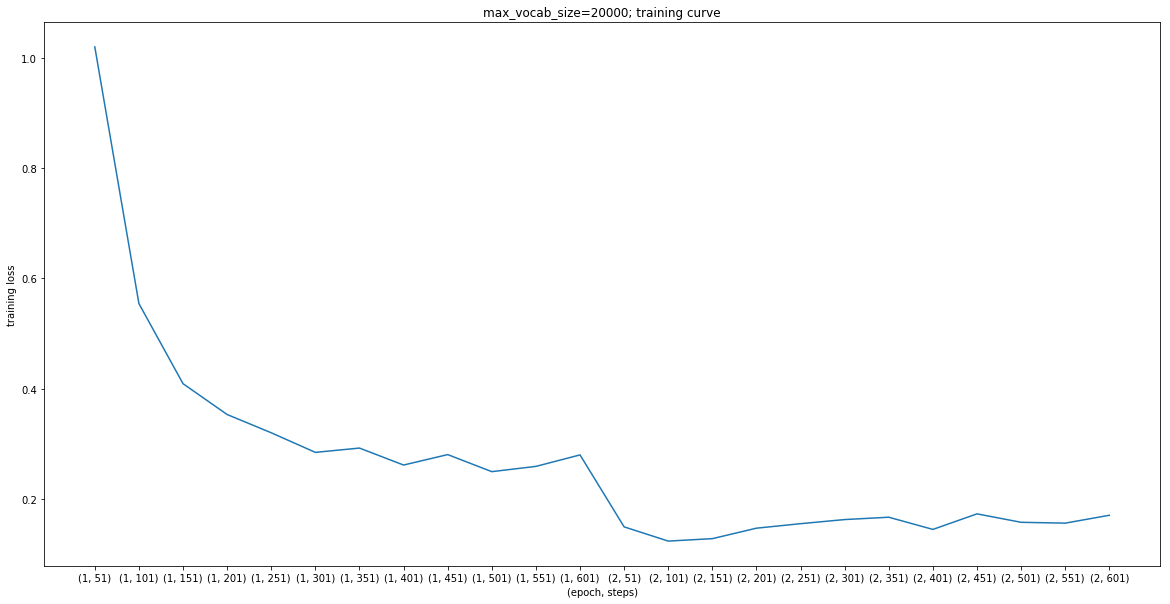

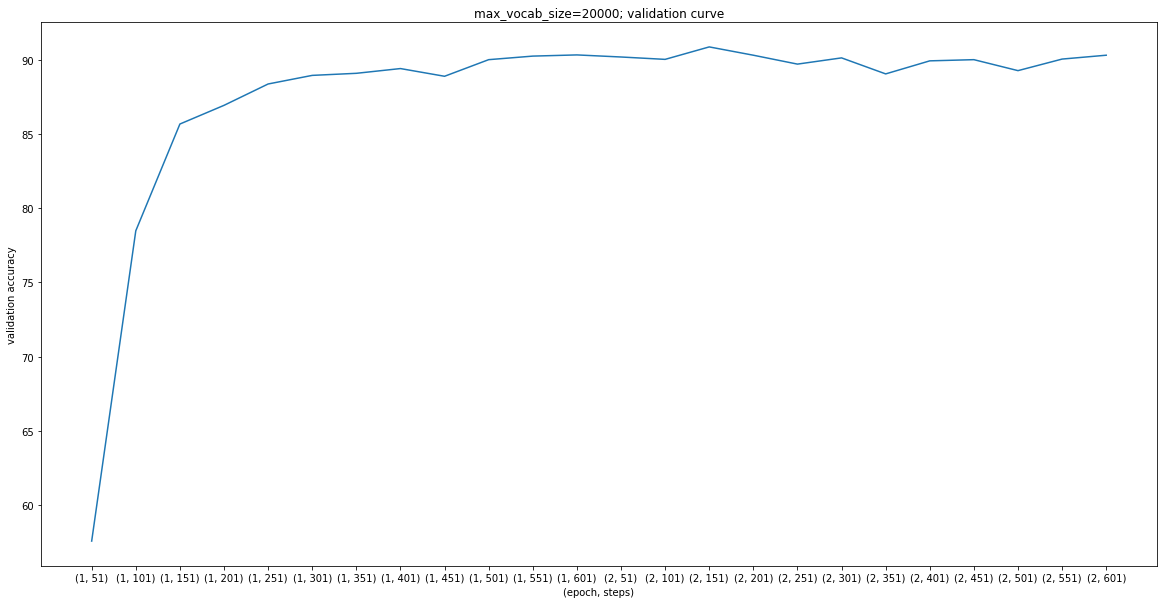

current max vocab size:  50000
Epoch: [1/2], Step: [51/625], trainning loss: 1.0151886653900146, Validation Acc: 49.92
Epoch: [1/2], Step: [101/625], trainning loss: 0.576033136844635, Validation Acc: 80.34
Epoch: [1/2], Step: [151/625], trainning loss: 0.4163641768693924, Validation Acc: 85.34
Epoch: [1/2], Step: [201/625], trainning loss: 0.3313532438874245, Validation Acc: 87.46
Epoch: [1/2], Step: [251/625], trainning loss: 0.3052553313970566, Validation Acc: 88.24
Epoch: [1/2], Step: [301/625], trainning loss: 0.291257099956274, Validation Acc: 89.64
Epoch: [1/2], Step: [351/625], trainning loss: 0.3056172689795494, Validation Acc: 89.06
Epoch: [1/2], Step: [401/625], trainning loss: 0.24796560406684875, Validation Acc: 89.04
Epoch: [1/2], Step: [451/625], trainning loss: 0.2808873298764229, Validation Acc: 90.4
Epoch: [1/2], Step: [501/625], trainning loss: 0.2694569554924965, Validation Acc: 90.48
Epoch: [1/2], Step: [551/625], trainning loss: 0.27167063862085344, Validation Acc

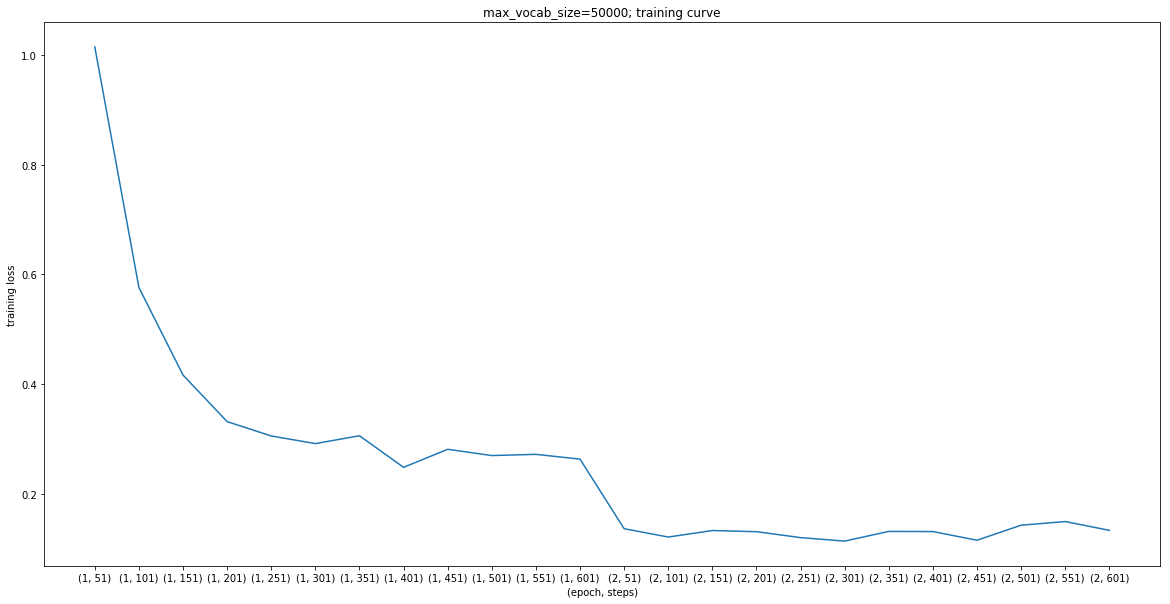

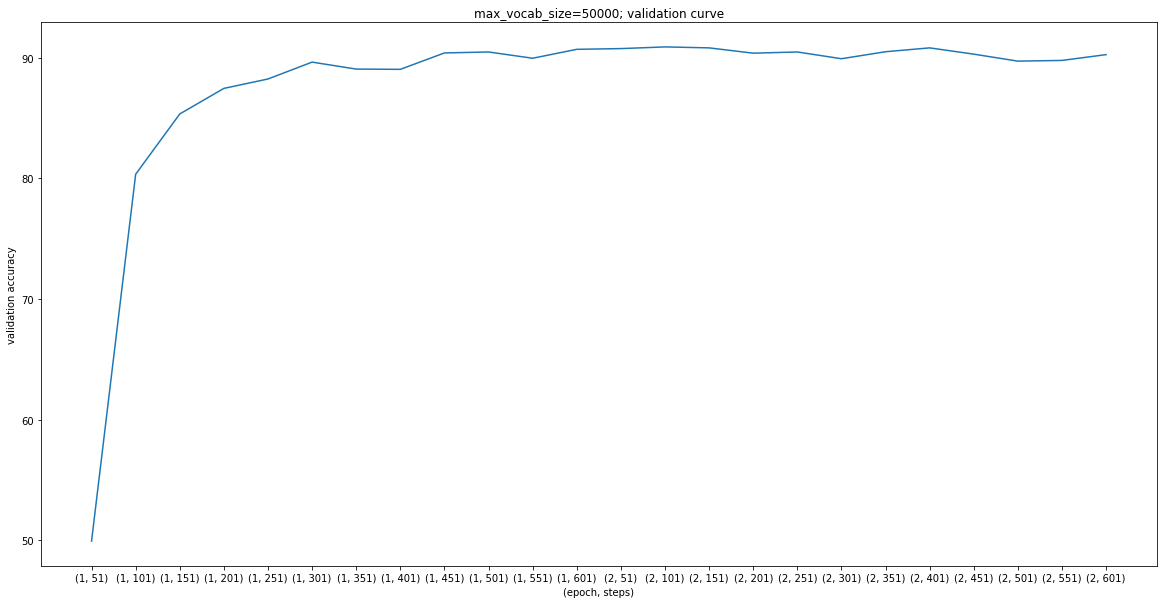

current max vocab size:  80000
Epoch: [1/2], Step: [51/625], trainning loss: 1.03261248588562, Validation Acc: 71.6
Epoch: [1/2], Step: [101/625], trainning loss: 0.5582891523838043, Validation Acc: 80.34
Epoch: [1/2], Step: [151/625], trainning loss: 0.4093005979061127, Validation Acc: 82.08
Epoch: [1/2], Step: [201/625], trainning loss: 0.33689648151397705, Validation Acc: 83.96
Epoch: [1/2], Step: [251/625], trainning loss: 0.3152944338321686, Validation Acc: 83.86
Epoch: [1/2], Step: [301/625], trainning loss: 0.29893235057592393, Validation Acc: 85.26
Epoch: [1/2], Step: [351/625], trainning loss: 0.2993005856871605, Validation Acc: 84.86
Epoch: [1/2], Step: [401/625], trainning loss: 0.29022018194198607, Validation Acc: 82.0
Epoch: [1/2], Step: [451/625], trainning loss: 0.25497862115502357, Validation Acc: 85.14
Epoch: [1/2], Step: [501/625], trainning loss: 0.27850410223007205, Validation Acc: 80.1
Epoch: [1/2], Step: [551/625], trainning loss: 0.232986858189106, Validation Acc

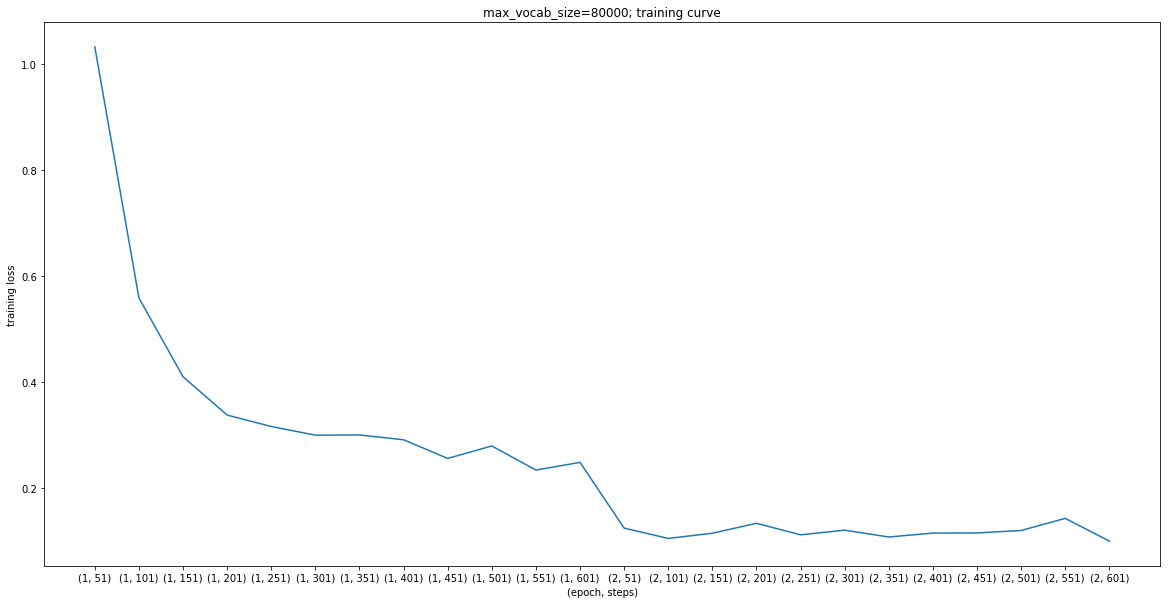

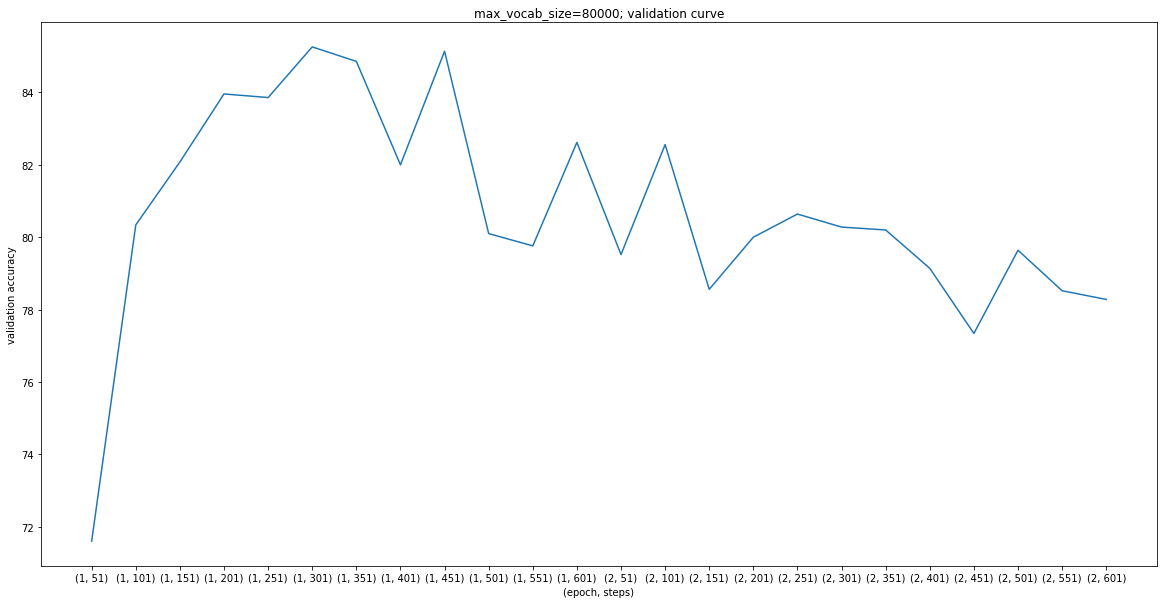

In [42]:
def tune_vocab_size(vocab_size_list):  
    # set initials
    new_train = []
    new_val = []
    max_val_acc = -1
    best_vocab_size = -1
    # get number of training samples, val samples, and test samples(since they don't change for different tokenization, this is the same as using .._nh datasets)
    train_size = len(train_data_tokens)
    val_size = len(val_data_tokens)
    test_size = len(test_data_tokens)
    
    # build data tokens with the right best_n for all train, val and test (even though test not used until the very last part where the model has been tuned)
    for n_i in range(2,best_n+1):
        for idx in range(train_size):
            train_data_tokens_nh[idx] += train_token_list_nh[n_i-2][idx]
        for idx in range(val_size):
            val_data_tokens_nh[idx] += val_token_list_nh[n_i -2][idx]
        for idx in range(test_size):
            test_data_tokens_nh[idx] += test_token_list_nh[n_i -2][idx]

    # tune vocab size
    for v_s in vocab_size_list:
        # get tokens+build vocab                
        #print(train_data_tokens[0])
        #print(val_data_tokens[0])
        token2id, id2token = build_vocab(best_n, all_train_tokens_nh,v_s,train_token_list_nh)
        train_data_indices = token2index_dataset(train_data_tokens_nh,token2id)
        val_data_indices = token2index_dataset(val_data_tokens_nh, token2id)

        # prepare data with dataloader for model
        train_dataset = movieDataset(train_data_indices, train_target, best_msl)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=lambda b: movie_collate_func(b, best_msl),
                                               shuffle=True)

        val_dataset = movieDataset(val_data_indices, val_target, best_msl)
        val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                                   batch_size=BATCH_SIZE,
                                                   collate_fn=lambda b: movie_collate_func(b, best_msl),
                                                   shuffle=True)


        # run
        print("current max vocab size: ", v_s)
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(emb_dim_default, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
        print ("Val Acc {}".format(val_acc_i))
        
        #plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.title("max_vocab_size="+str(v_s)+"; training curve")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.title("max_vocab_size="+str(v_s)+"; validation curve")
        plt.show()

        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_vocab_size = v_s 
    return best_vocab_size
    

best_vocab_size = tune_vocab_size([10000,20000,50000,80000])

In [43]:
best_vocab_size

50000

In [44]:
train_data_tokens_nh[0]

['for',
 'a',
 'movie',
 'that',
 'gets',
 'no',
 'respect',
 'there',
 'sure',
 'are',
 'a',
 'lot',
 'of',
 'memorable',
 'quotes',
 'listed',
 'for',
 'this',
 'gem',
 'imagine',
 'a',
 'movie',
 'where',
 'joe',
 'piscopo',
 'is',
 'actually',
 'funny',
 'maureen',
 'stapleton',
 'is',
 'a',
 'scene',
 'stealer',
 'the',
 'moroni',
 'character',
 'is',
 'an',
 'absolute',
 'scream',
 'watch',
 'for',
 'alan',
 'the',
 'skipper',
 'hale',
 'jr',
 'as',
 'a',
 'police',
 'sgt']

In [45]:
# build the dataset and data loader for train, val and test
token2id, id2token = build_vocab(best_n, all_train_tokens_nh,best_vocab_size, train_token_list_nh)
train_data_indices = token2index_dataset(train_data_tokens_nh,token2id)
val_data_indices = token2index_dataset(val_data_tokens_nh, token2id)
test_data_indices = token2index_dataset(test_data_tokens_nh, token2id)


# prepare data with dataloader for model
train_dataset = movieDataset(train_data_indices, train_target, best_msl)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=lambda b: movie_collate_func(b, best_msl),
                                       shuffle=True)

val_dataset = movieDataset(val_data_indices, val_target, best_msl)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=lambda b: movie_collate_func(b, best_msl),
                                           shuffle=True)

test_dataset = movieDataset(test_data_indices, test_target, best_msl)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=lambda b: movie_collate_func(b, best_msl),
                                       shuffle=True)


In [46]:
# tune embedding dimension with best_n and best_vocab_size
def tune_emd_dim(emb_dim_size, train_loader, val_loader, id2token):
    max_val_acc = -1
    best_emb = -1
    for emb_i in emb_dim_size:
        
        print("current embedding size: ", emb_i)
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(emb_i, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
        print ("Val Acc {}".format(val_acc_i))
        
        #plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.title("embedding_dim="+str(emb_i)+"; training curve")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.title("embedding_dim="+str(emb_i)+"; validation curve")
        plt.show()
        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_emb = emb_i
    return best_emb

current embedding size:  100
Epoch: [1/2], Step: [51/625], trainning loss: 0.9773379564285278, Validation Acc: 75.8
Epoch: [1/2], Step: [101/625], trainning loss: 0.5682632827758789, Validation Acc: 80.66
Epoch: [1/2], Step: [151/625], trainning loss: 0.4060720556974411, Validation Acc: 85.7
Epoch: [1/2], Step: [201/625], trainning loss: 0.3437036767601967, Validation Acc: 85.94
Epoch: [1/2], Step: [251/625], trainning loss: 0.3228882294893265, Validation Acc: 87.12
Epoch: [1/2], Step: [301/625], trainning loss: 0.29252136588096617, Validation Acc: 88.72
Epoch: [1/2], Step: [351/625], trainning loss: 0.2873949509859085, Validation Acc: 89.7
Epoch: [1/2], Step: [401/625], trainning loss: 0.28045911341905594, Validation Acc: 87.72
Epoch: [1/2], Step: [451/625], trainning loss: 0.2700021892786026, Validation Acc: 90.3
Epoch: [1/2], Step: [501/625], trainning loss: 0.2749118232727051, Validation Acc: 90.42
Epoch: [1/2], Step: [551/625], trainning loss: 0.2626160942018032, Validation Acc: 9

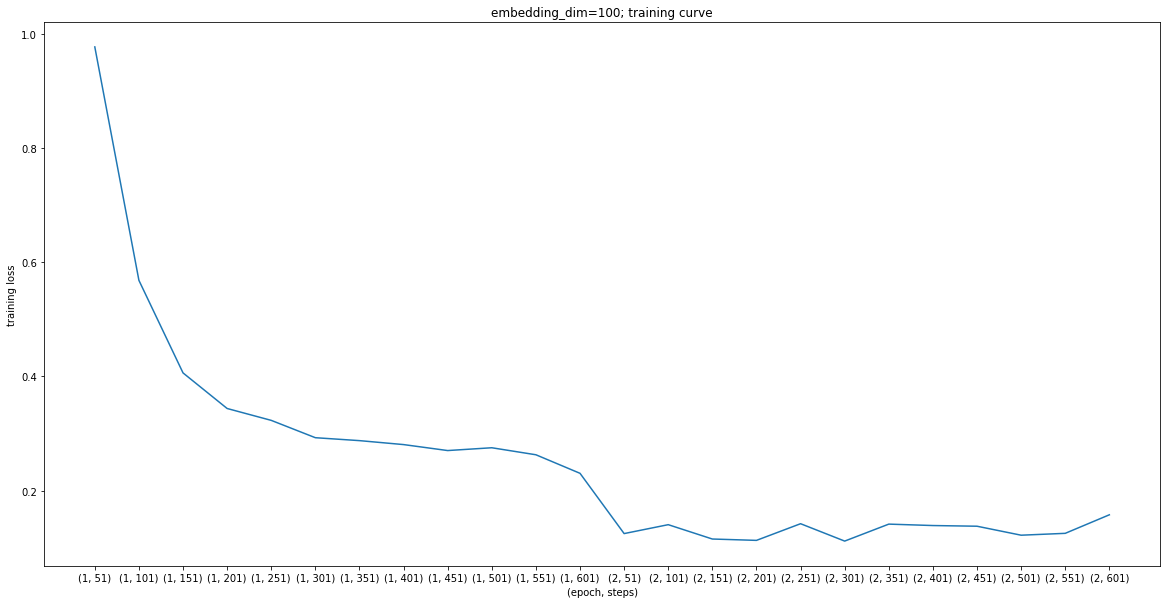

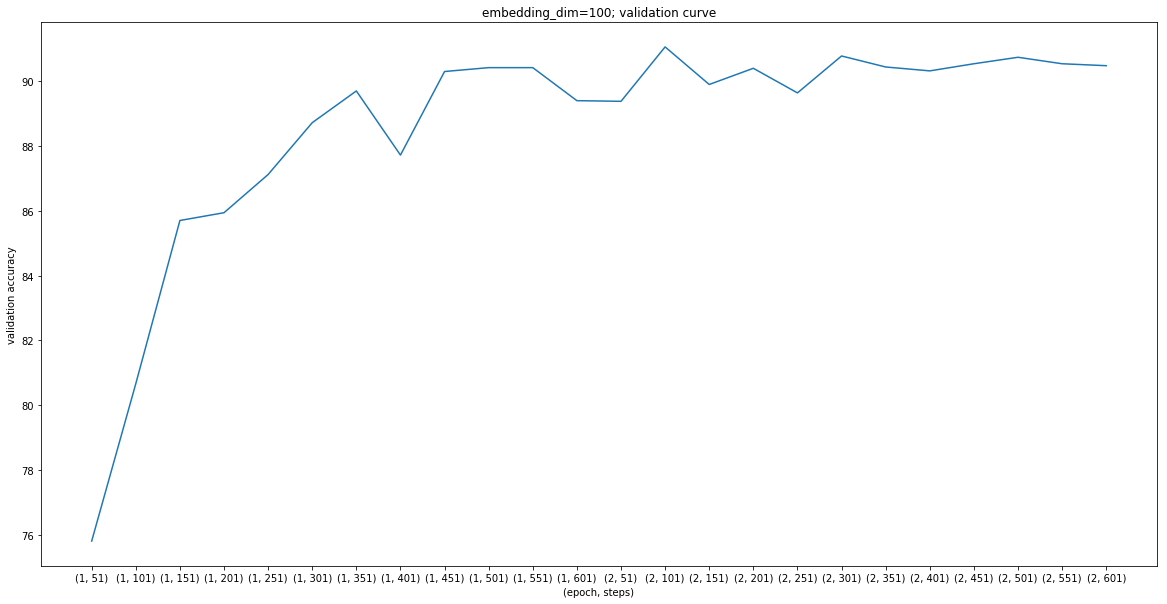

current embedding size:  200
Epoch: [1/2], Step: [51/625], trainning loss: 0.8779557192325592, Validation Acc: 68.76
Epoch: [1/2], Step: [101/625], trainning loss: 0.46629859387874606, Validation Acc: 83.0
Epoch: [1/2], Step: [151/625], trainning loss: 0.3419936102628708, Validation Acc: 83.62
Epoch: [1/2], Step: [201/625], trainning loss: 0.32239078789949416, Validation Acc: 88.64
Epoch: [1/2], Step: [251/625], trainning loss: 0.31451474100351334, Validation Acc: 88.6
Epoch: [1/2], Step: [301/625], trainning loss: 0.31191879630088803, Validation Acc: 89.88
Epoch: [1/2], Step: [351/625], trainning loss: 0.2743771469593048, Validation Acc: 86.9
Epoch: [1/2], Step: [401/625], trainning loss: 0.2566414576768875, Validation Acc: 90.18
Epoch: [1/2], Step: [451/625], trainning loss: 0.2811747753620148, Validation Acc: 89.16
Epoch: [1/2], Step: [501/625], trainning loss: 0.27044553458690646, Validation Acc: 88.38
Epoch: [1/2], Step: [551/625], trainning loss: 0.26810924291610716, Validation A

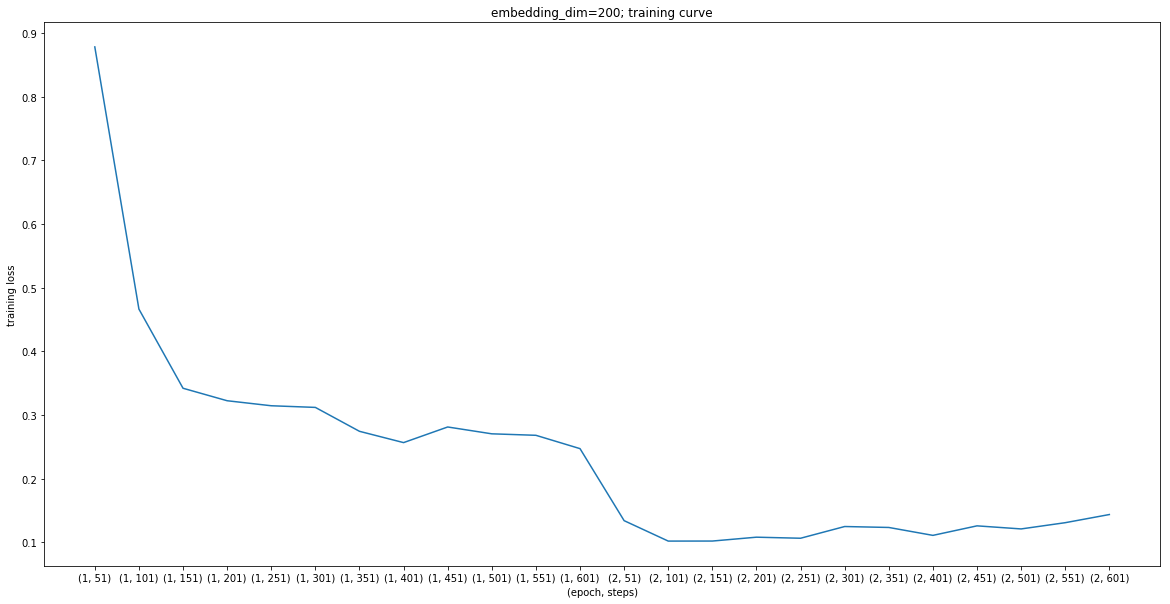

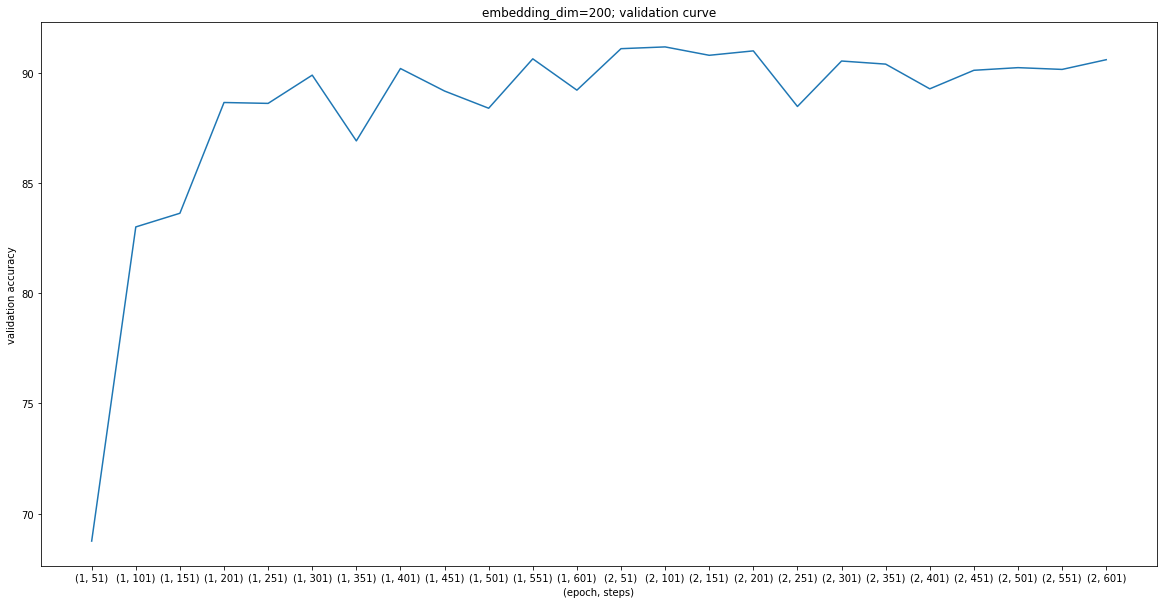

current embedding size:  500
Epoch: [1/2], Step: [51/625], trainning loss: 0.7027362632751465, Validation Acc: 79.4
Epoch: [1/2], Step: [101/625], trainning loss: 0.3936109527945518, Validation Acc: 85.48
Epoch: [1/2], Step: [151/625], trainning loss: 0.3179962247610092, Validation Acc: 85.62
Epoch: [1/2], Step: [201/625], trainning loss: 0.33806420505046847, Validation Acc: 88.36
Epoch: [1/2], Step: [251/625], trainning loss: 0.2709083476662636, Validation Acc: 88.9
Epoch: [1/2], Step: [301/625], trainning loss: 0.26749068439006807, Validation Acc: 89.0
Epoch: [1/2], Step: [351/625], trainning loss: 0.3185174456238747, Validation Acc: 88.38
Epoch: [1/2], Step: [401/625], trainning loss: 0.27091123044490817, Validation Acc: 89.38
Epoch: [1/2], Step: [451/625], trainning loss: 0.2911552396416664, Validation Acc: 89.68
Epoch: [1/2], Step: [501/625], trainning loss: 0.2736243198812008, Validation Acc: 90.02
Epoch: [1/2], Step: [551/625], trainning loss: 0.29288636177778243, Validation Acc

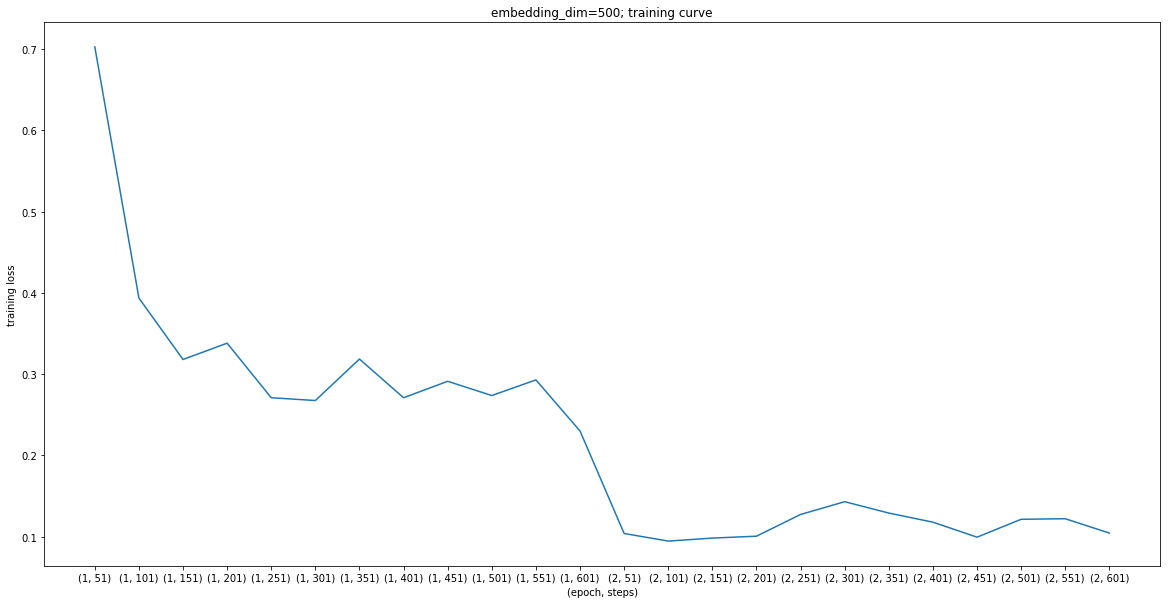

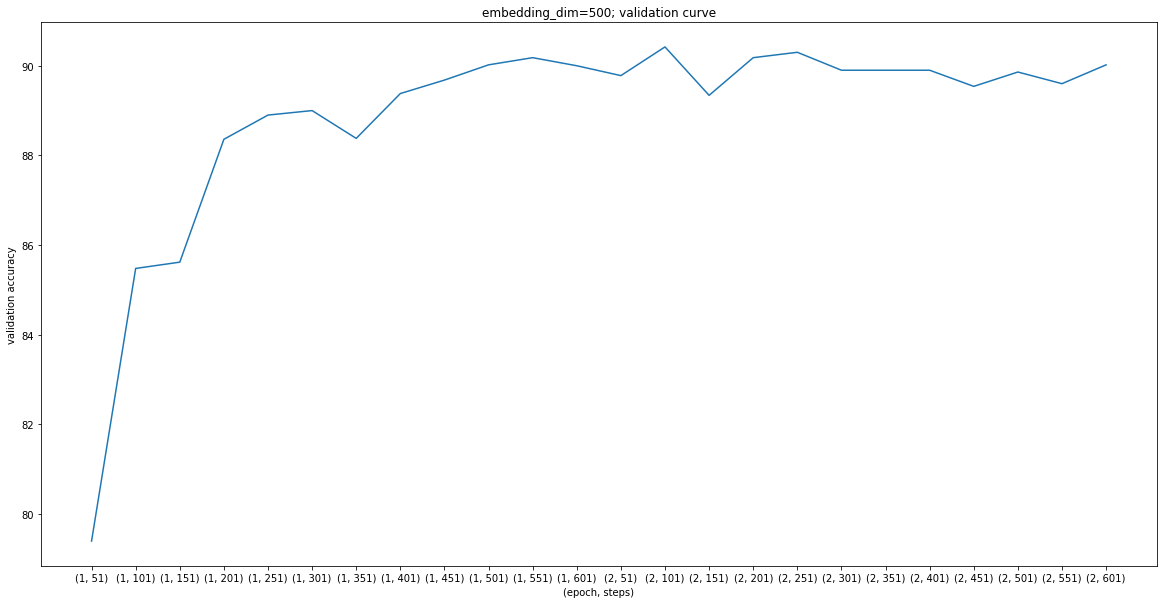

current embedding size:  800
Epoch: [1/2], Step: [51/625], trainning loss: 0.6743501269817352, Validation Acc: 79.9
Epoch: [1/2], Step: [101/625], trainning loss: 0.39144666761159896, Validation Acc: 83.94
Epoch: [1/2], Step: [151/625], trainning loss: 0.3498107025027275, Validation Acc: 86.96
Epoch: [1/2], Step: [201/625], trainning loss: 0.30482693821191786, Validation Acc: 87.96
Epoch: [1/2], Step: [251/625], trainning loss: 0.3161163601279259, Validation Acc: 88.5
Epoch: [1/2], Step: [301/625], trainning loss: 0.27225410312414167, Validation Acc: 88.96
Epoch: [1/2], Step: [351/625], trainning loss: 0.26178764015436173, Validation Acc: 87.84
Epoch: [1/2], Step: [401/625], trainning loss: 0.27620585680007936, Validation Acc: 89.44
Epoch: [1/2], Step: [451/625], trainning loss: 0.2891259507834911, Validation Acc: 86.78
Epoch: [1/2], Step: [501/625], trainning loss: 0.27855297550559044, Validation Acc: 89.04
Epoch: [1/2], Step: [551/625], trainning loss: 0.2634151439368725, Validation 

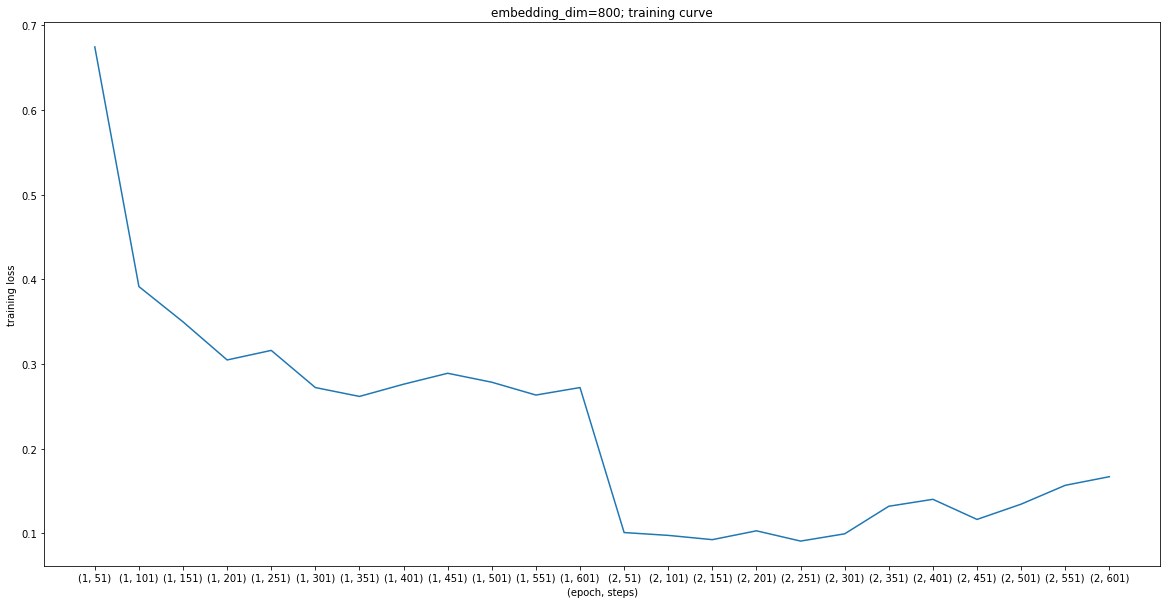

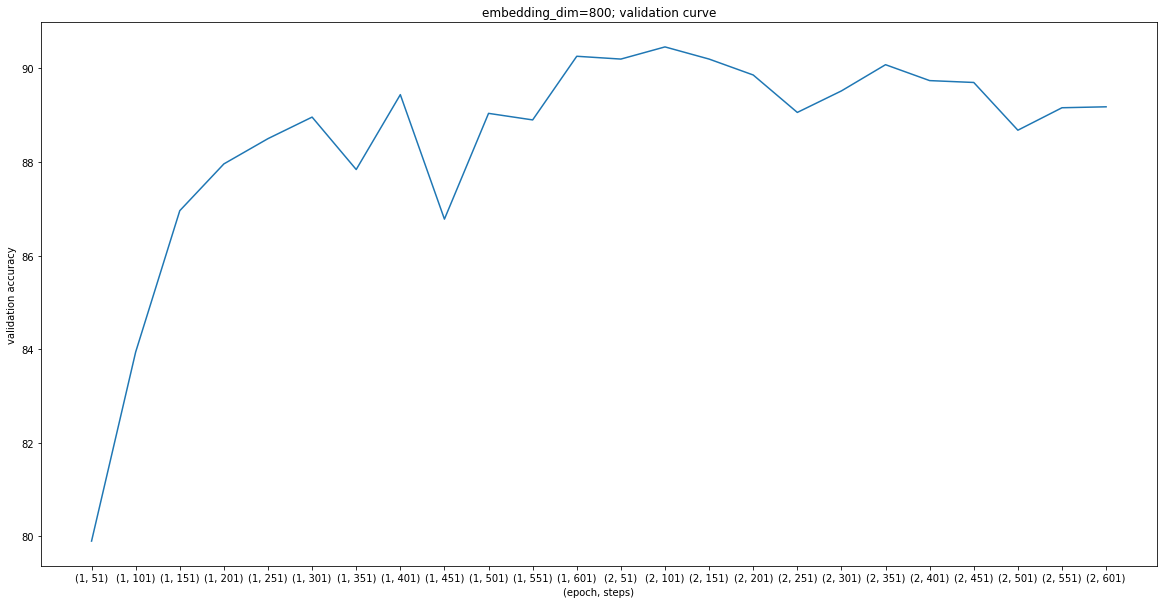

In [47]:
emb_dim_size = [100,200,500,800]
best_emb = tune_emd_dim(emb_dim_size, train_loader, val_loader, id2token)

In [48]:
best_emb

200

In [51]:
def tune_optimizer(optimizer_lst, train_loader, val_loader, id2token):
    max_val_acc = -1
    best_opt = -1
    for opt_i in optimizer_lst:
        
        print("current optimizer: ", opt_i)
        print(best_emb)
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(best_emb, lr_default, num_epochs_default, train_loader, val_loader,id2token, opt_i)
        print ("Val Acc {}".format(val_acc_i))
        
        #plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.title("optimizer="+opt_i+"; training curve")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.title("optimizer="+opt_i+"; validation curve")
        plt.show()
        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_opt = opt_i
    return best_opt

current optimizer:  adam
200
Epoch: [1/2], Step: [51/625], trainning loss: 0.8982893669605255, Validation Acc: 65.6
Epoch: [1/2], Step: [101/625], trainning loss: 0.48676802158355714, Validation Acc: 84.04
Epoch: [1/2], Step: [151/625], trainning loss: 0.37901577293872835, Validation Acc: 86.88
Epoch: [1/2], Step: [201/625], trainning loss: 0.31735048413276673, Validation Acc: 88.6
Epoch: [1/2], Step: [251/625], trainning loss: 0.2879111278057098, Validation Acc: 89.74
Epoch: [1/2], Step: [301/625], trainning loss: 0.2792572420835495, Validation Acc: 89.7
Epoch: [1/2], Step: [351/625], trainning loss: 0.26615850687026976, Validation Acc: 89.86
Epoch: [1/2], Step: [401/625], trainning loss: 0.2794072452187538, Validation Acc: 90.34
Epoch: [1/2], Step: [451/625], trainning loss: 0.26367339462041856, Validation Acc: 90.38
Epoch: [1/2], Step: [501/625], trainning loss: 0.23776760637760164, Validation Acc: 90.1
Epoch: [1/2], Step: [551/625], trainning loss: 0.27347561091184613, Validation A

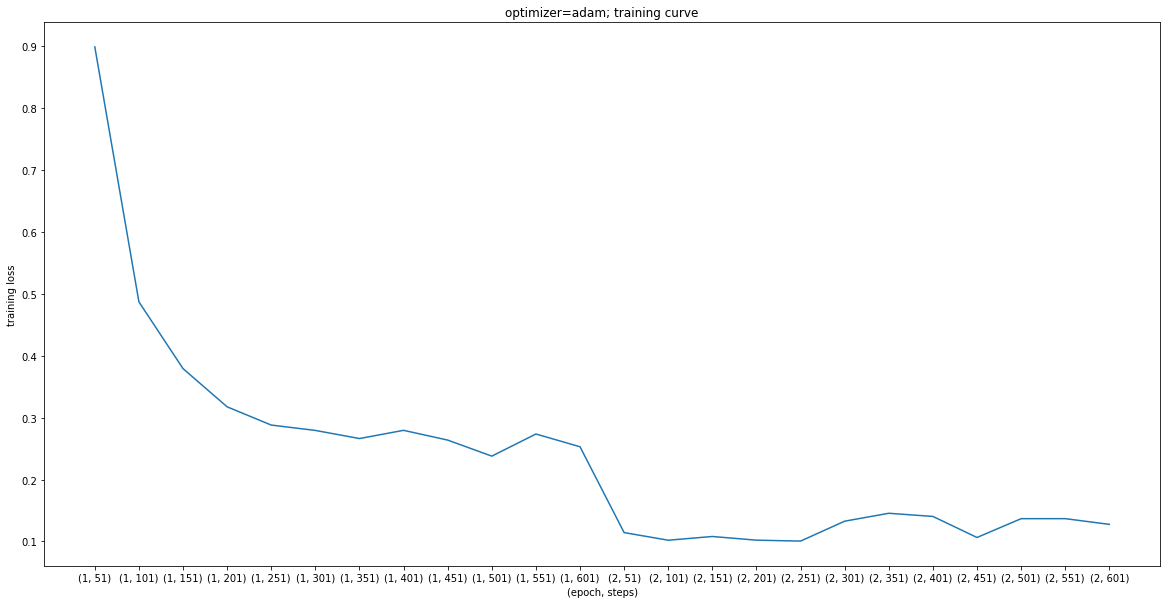

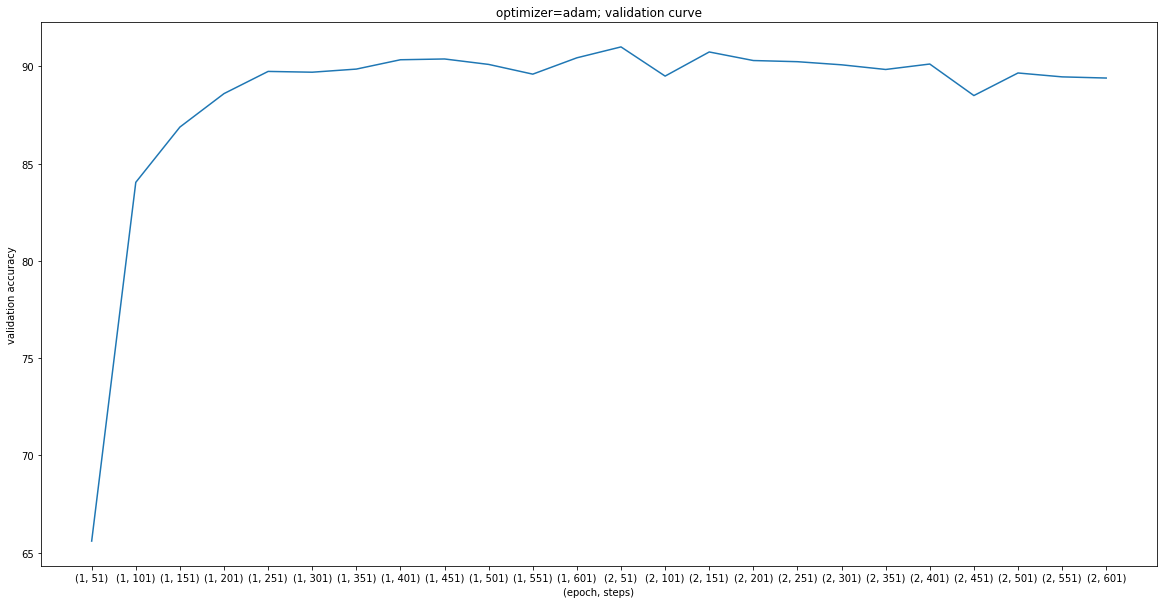

current optimizer:  sgd
200
Epoch: [1/2], Step: [51/625], trainning loss: 2.7777010917663576, Validation Acc: 50.34
Epoch: [1/2], Step: [101/625], trainning loss: 2.239670262336731, Validation Acc: 51.76
Epoch: [1/2], Step: [151/625], trainning loss: 1.8597101044654847, Validation Acc: 51.6
Epoch: [1/2], Step: [201/625], trainning loss: 1.5717032766342163, Validation Acc: 51.84
Epoch: [1/2], Step: [251/625], trainning loss: 1.372496030330658, Validation Acc: 53.62
Epoch: [1/2], Step: [301/625], trainning loss: 1.2252081966400146, Validation Acc: 52.6
Epoch: [1/2], Step: [351/625], trainning loss: 1.1223784613609313, Validation Acc: 55.8
Epoch: [1/2], Step: [401/625], trainning loss: 1.0471311461925508, Validation Acc: 56.82
Epoch: [1/2], Step: [451/625], trainning loss: 0.9879714393615723, Validation Acc: 58.98
Epoch: [1/2], Step: [501/625], trainning loss: 0.9476370418071747, Validation Acc: 62.08
Epoch: [1/2], Step: [551/625], trainning loss: 0.9145370686054229, Validation Acc: 62.14

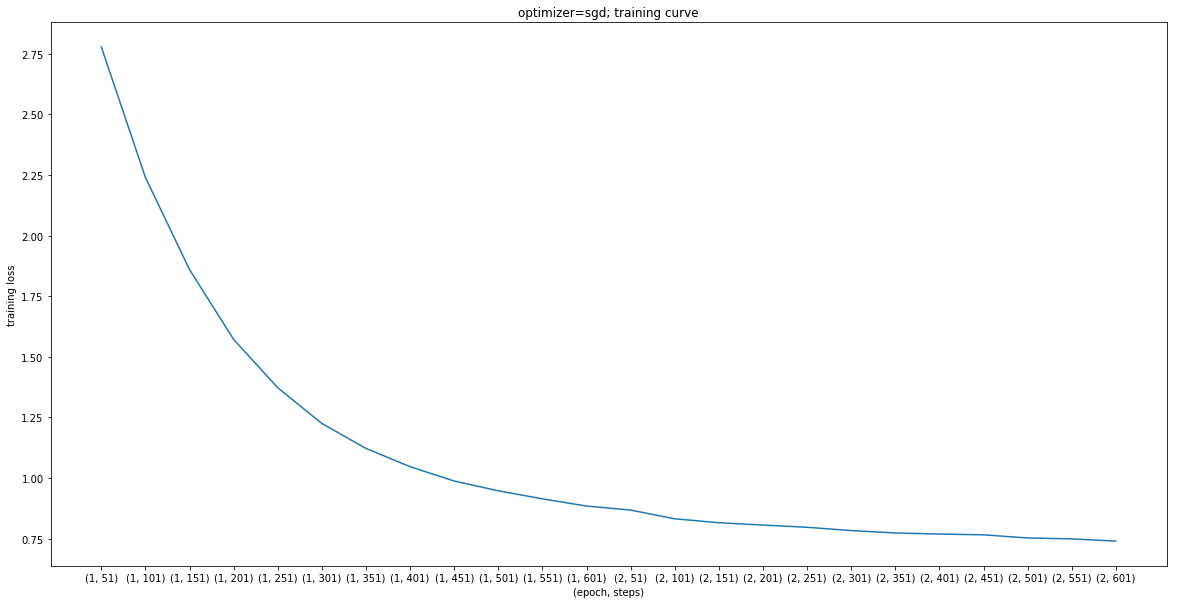

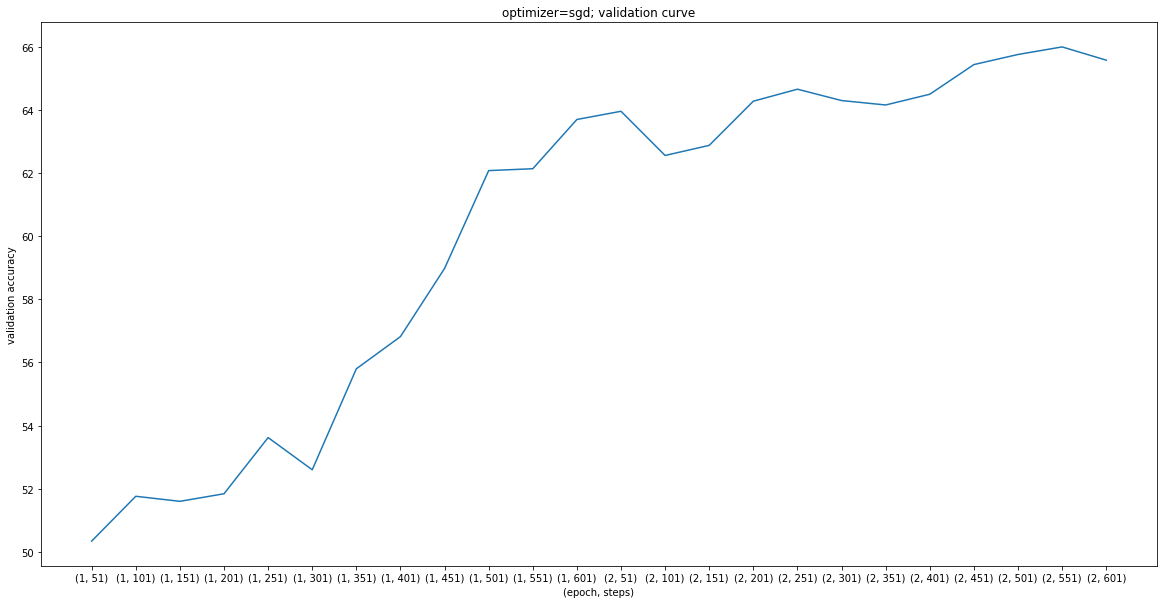

In [52]:
optimizer_lst = ['adam', 'sgd']
best_opt = tune_optimizer(optimizer_lst, train_loader, val_loader, id2token)

In [53]:
best_opt

'adam'

In [54]:
def tune_learning_rate(lr_lst, train_loader, val_loader, id2token):
    max_val_acc = -1
    best_lr = -1
    for lr_i in lr_lst:
        
        print("current learning rate: ", lr_i)
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(best_emb, lr_i, num_epochs_default, train_loader, val_loader,id2token, best_opt)
        print ("Val Acc {}".format(val_acc_i))
        
        #plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.show()
        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_lr = lr_i
    return best_lr

current learning rate:  0.001
Epoch: [1/2], Step: [51/625], trainning loss: 2.193525912761688, Validation Acc: 50.54
Epoch: [1/2], Step: [101/625], trainning loss: 0.9889057719707489, Validation Acc: 55.58
Epoch: [1/2], Step: [151/625], trainning loss: 0.7478615725040436, Validation Acc: 63.72
Epoch: [1/2], Step: [201/625], trainning loss: 0.6990918052196503, Validation Acc: 66.84
Epoch: [1/2], Step: [251/625], trainning loss: 0.6791700851917267, Validation Acc: 69.72
Epoch: [1/2], Step: [301/625], trainning loss: 0.6474893236160278, Validation Acc: 71.86
Epoch: [1/2], Step: [351/625], trainning loss: 0.629159996509552, Validation Acc: 75.94
Epoch: [1/2], Step: [401/625], trainning loss: 0.5948703229427338, Validation Acc: 76.78
Epoch: [1/2], Step: [451/625], trainning loss: 0.5766182845830917, Validation Acc: 78.34
Epoch: [1/2], Step: [501/625], trainning loss: 0.5460098356008529, Validation Acc: 79.54
Epoch: [1/2], Step: [551/625], trainning loss: 0.5219115328788757, Validation Acc: 

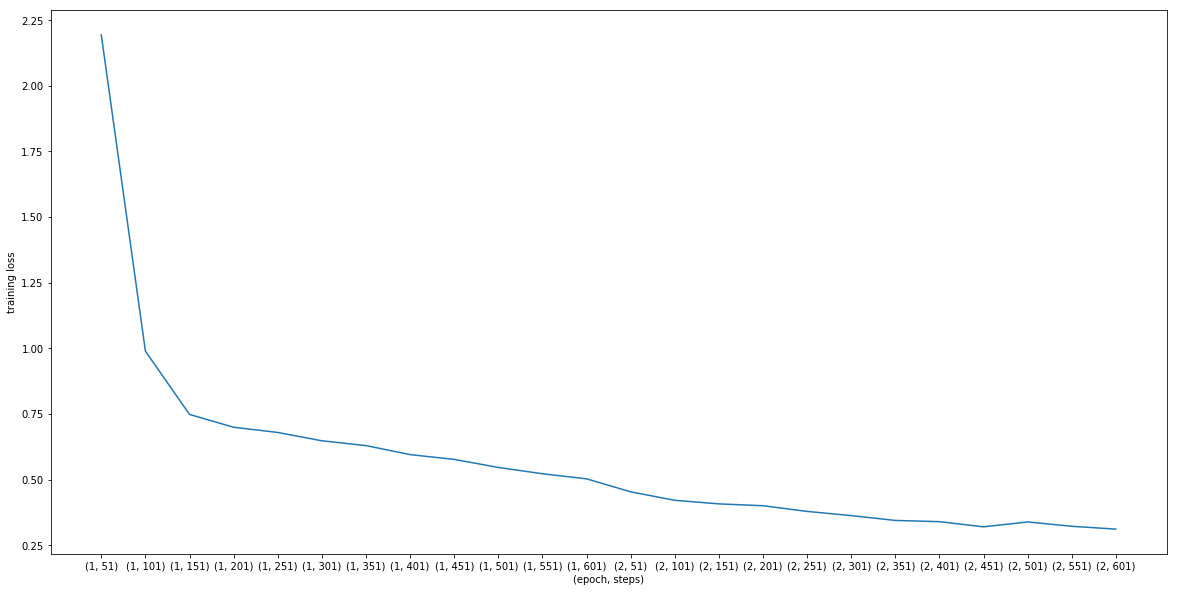

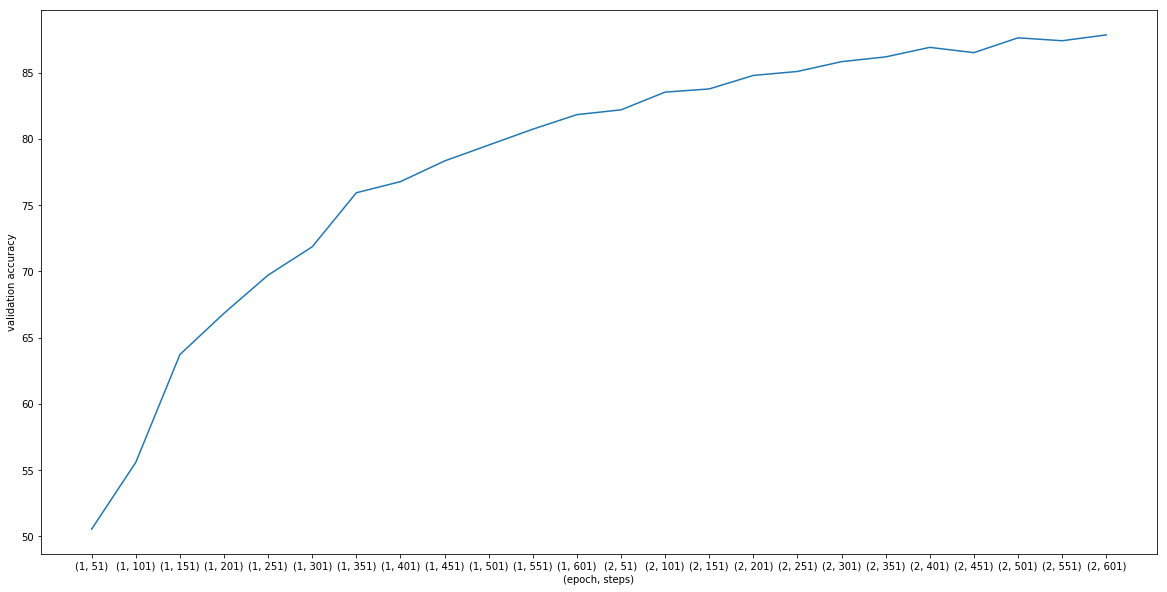

current learning rate:  0.003
Epoch: [1/2], Step: [51/625], trainning loss: 1.3521116137504579, Validation Acc: 52.14
Epoch: [1/2], Step: [101/625], trainning loss: 0.6576379883289337, Validation Acc: 72.38
Epoch: [1/2], Step: [151/625], trainning loss: 0.5996596598625183, Validation Acc: 77.52
Epoch: [1/2], Step: [201/625], trainning loss: 0.5395896703004837, Validation Acc: 79.88
Epoch: [1/2], Step: [251/625], trainning loss: 0.45581525027751923, Validation Acc: 83.8
Epoch: [1/2], Step: [301/625], trainning loss: 0.4180067676305771, Validation Acc: 85.2
Epoch: [1/2], Step: [351/625], trainning loss: 0.3733740040659905, Validation Acc: 86.44
Epoch: [1/2], Step: [401/625], trainning loss: 0.3283337730169296, Validation Acc: 87.3
Epoch: [1/2], Step: [451/625], trainning loss: 0.3362515616416931, Validation Acc: 88.38
Epoch: [1/2], Step: [501/625], trainning loss: 0.3149020707607269, Validation Acc: 88.88
Epoch: [1/2], Step: [551/625], trainning loss: 0.27658004850149154, Validation Acc:

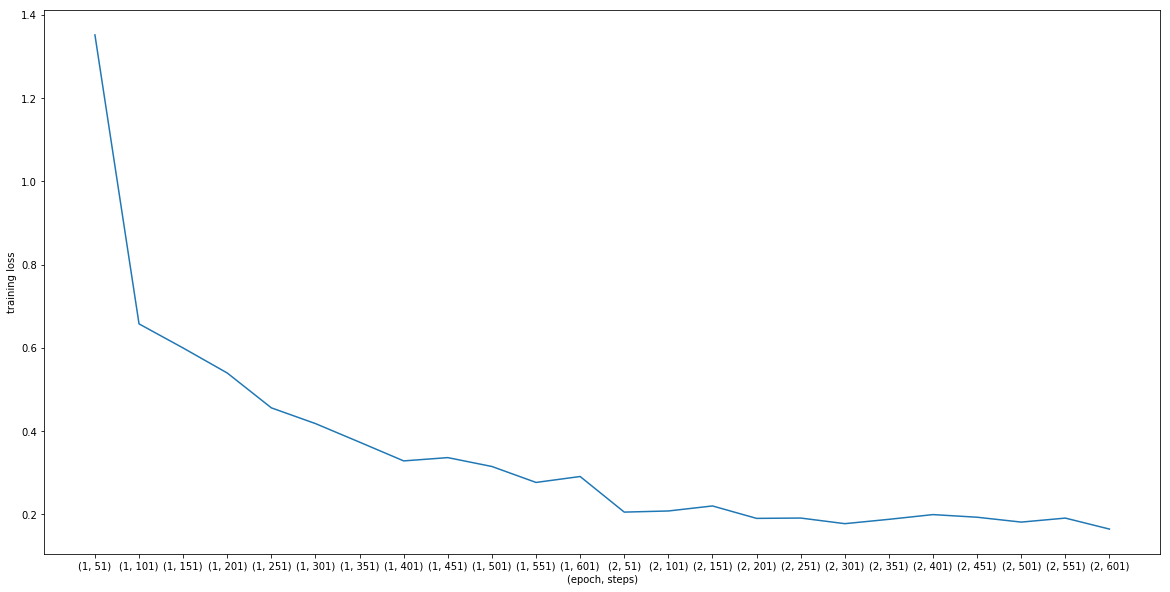

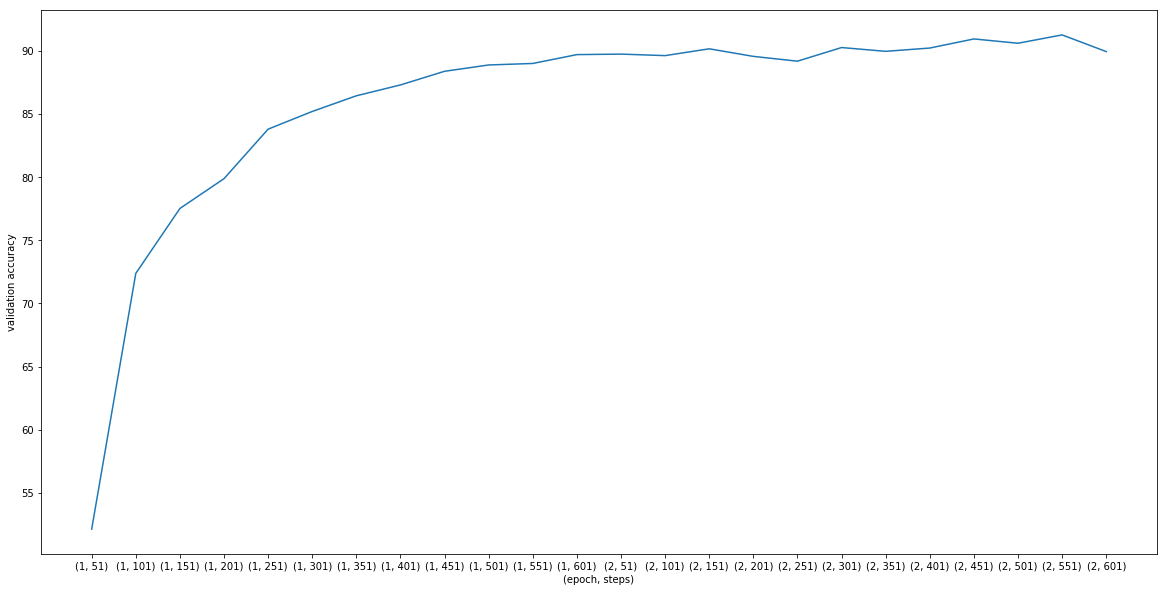

current learning rate:  0.005
Epoch: [1/2], Step: [51/625], trainning loss: 1.1663488233089447, Validation Acc: 70.08
Epoch: [1/2], Step: [101/625], trainning loss: 0.5948875558376312, Validation Acc: 76.36
Epoch: [1/2], Step: [151/625], trainning loss: 0.49577303826808927, Validation Acc: 81.62
Epoch: [1/2], Step: [201/625], trainning loss: 0.42618106842041015, Validation Acc: 85.42
Epoch: [1/2], Step: [251/625], trainning loss: 0.37222541332244874, Validation Acc: 87.3
Epoch: [1/2], Step: [301/625], trainning loss: 0.3496609398722649, Validation Acc: 87.84
Epoch: [1/2], Step: [351/625], trainning loss: 0.2960297670960426, Validation Acc: 87.74
Epoch: [1/2], Step: [401/625], trainning loss: 0.2947040882706642, Validation Acc: 88.98
Epoch: [1/2], Step: [451/625], trainning loss: 0.28293715819716453, Validation Acc: 89.5
Epoch: [1/2], Step: [501/625], trainning loss: 0.26015319406986237, Validation Acc: 89.94
Epoch: [1/2], Step: [551/625], trainning loss: 0.2529384513199329, Validation 

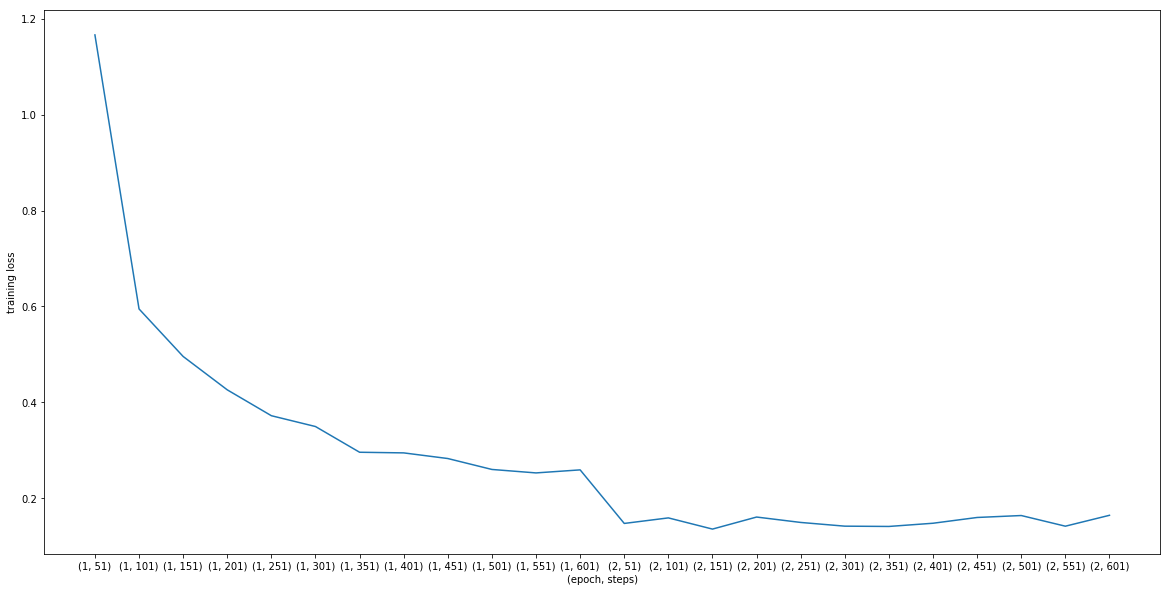

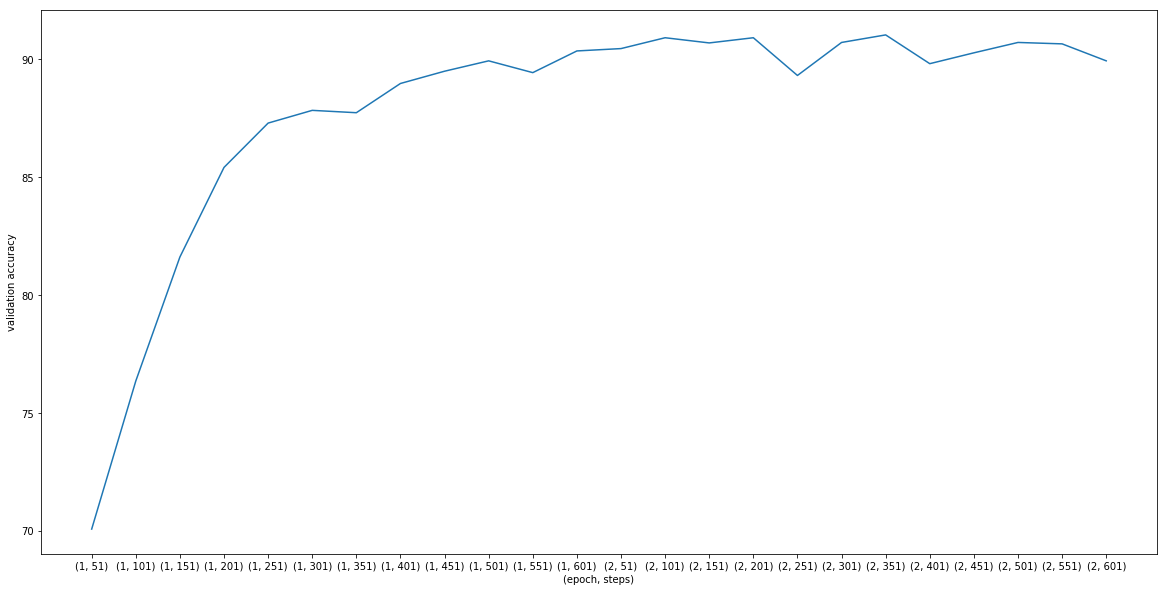

current learning rate:  0.008
Epoch: [1/2], Step: [51/625], trainning loss: 0.9525408470630645, Validation Acc: 73.28
Epoch: [1/2], Step: [101/625], trainning loss: 0.5259872609376908, Validation Acc: 77.04
Epoch: [1/2], Step: [151/625], trainning loss: 0.3948176693916321, Validation Acc: 86.26
Epoch: [1/2], Step: [201/625], trainning loss: 0.33166440784931184, Validation Acc: 86.58
Epoch: [1/2], Step: [251/625], trainning loss: 0.3052526649832725, Validation Acc: 88.54
Epoch: [1/2], Step: [301/625], trainning loss: 0.2983147615194321, Validation Acc: 88.82
Epoch: [1/2], Step: [351/625], trainning loss: 0.26901506900787353, Validation Acc: 90.12
Epoch: [1/2], Step: [401/625], trainning loss: 0.25850283443927763, Validation Acc: 88.52
Epoch: [1/2], Step: [451/625], trainning loss: 0.2716829252243042, Validation Acc: 90.38
Epoch: [1/2], Step: [501/625], trainning loss: 0.2850638696551323, Validation Acc: 90.36
Epoch: [1/2], Step: [551/625], trainning loss: 0.22206854701042175, Validation

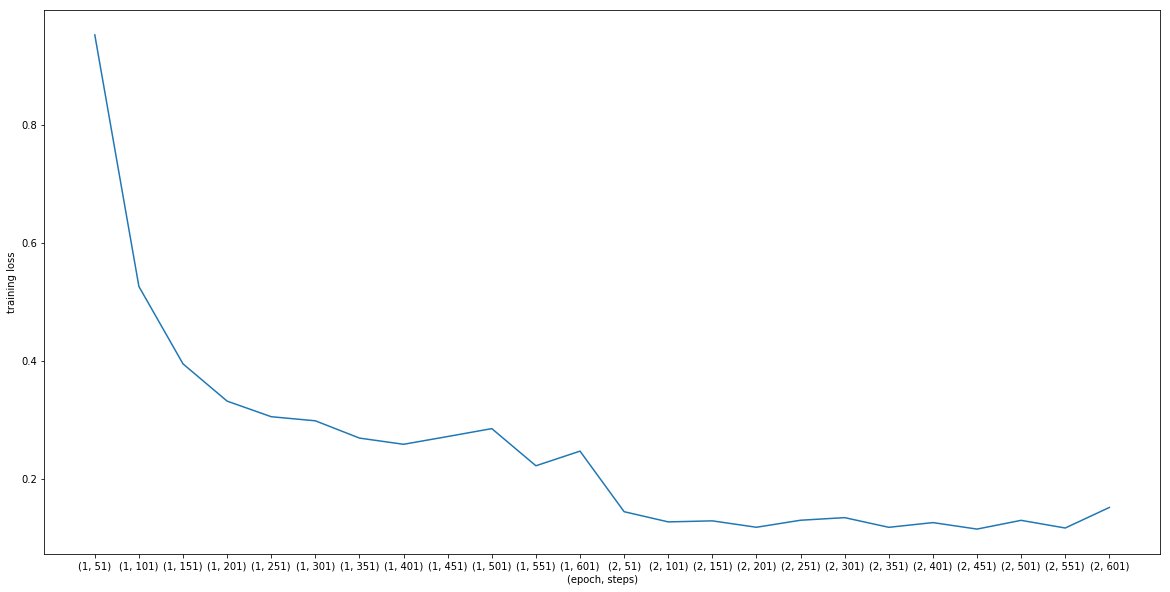

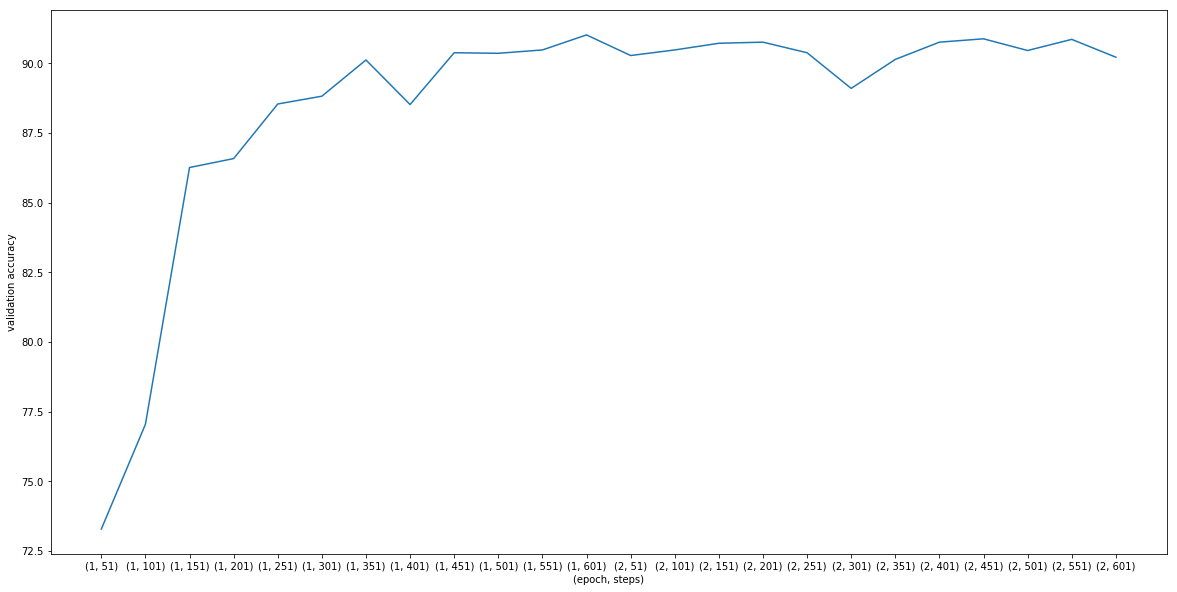

current learning rate:  0.01
Epoch: [1/2], Step: [51/625], trainning loss: 0.8917017376422882, Validation Acc: 76.42
Epoch: [1/2], Step: [101/625], trainning loss: 0.4629689013957977, Validation Acc: 80.52
Epoch: [1/2], Step: [151/625], trainning loss: 0.35536867678165435, Validation Acc: 85.94
Epoch: [1/2], Step: [201/625], trainning loss: 0.3262418070435524, Validation Acc: 88.18
Epoch: [1/2], Step: [251/625], trainning loss: 0.28465786278247834, Validation Acc: 88.42
Epoch: [1/2], Step: [301/625], trainning loss: 0.3003022402524948, Validation Acc: 89.4
Epoch: [1/2], Step: [351/625], trainning loss: 0.258615657389164, Validation Acc: 89.74
Epoch: [1/2], Step: [401/625], trainning loss: 0.2604845824837685, Validation Acc: 89.86
Epoch: [1/2], Step: [451/625], trainning loss: 0.29895194232463834, Validation Acc: 89.92
Epoch: [1/2], Step: [501/625], trainning loss: 0.26093284636735914, Validation Acc: 90.64
Epoch: [1/2], Step: [551/625], trainning loss: 0.25440621048212053, Validation A

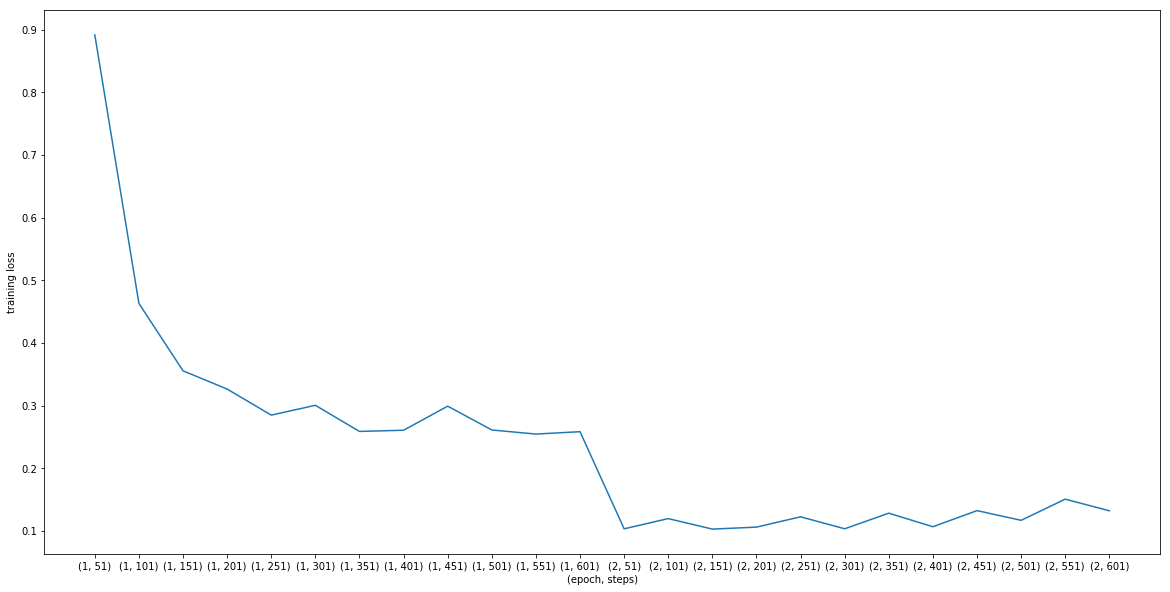

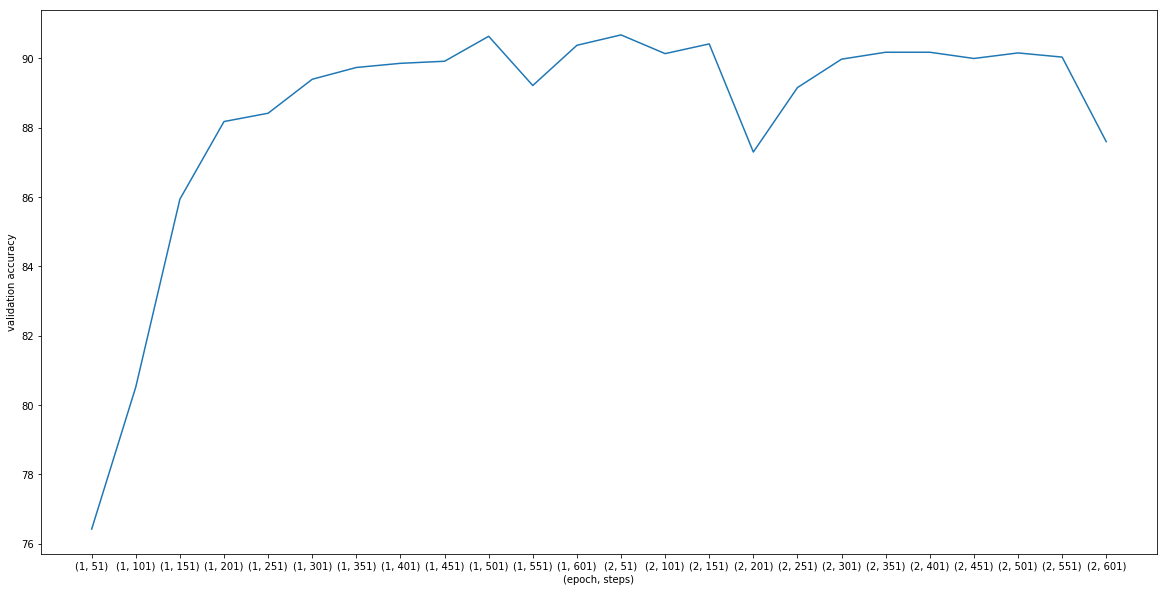

current learning rate:  0.02
Epoch: [1/2], Step: [51/625], trainning loss: 0.7097353440523148, Validation Acc: 81.8
Epoch: [1/2], Step: [101/625], trainning loss: 0.3623805892467499, Validation Acc: 86.78
Epoch: [1/2], Step: [151/625], trainning loss: 0.3301377093791962, Validation Acc: 87.14
Epoch: [1/2], Step: [201/625], trainning loss: 0.33560206562280653, Validation Acc: 87.9
Epoch: [1/2], Step: [251/625], trainning loss: 0.293188236951828, Validation Acc: 89.06
Epoch: [1/2], Step: [301/625], trainning loss: 0.2593805965781212, Validation Acc: 89.22
Epoch: [1/2], Step: [351/625], trainning loss: 0.265889490544796, Validation Acc: 89.52
Epoch: [1/2], Step: [401/625], trainning loss: 0.2576755228638649, Validation Acc: 90.2
Epoch: [1/2], Step: [451/625], trainning loss: 0.258061109483242, Validation Acc: 90.06
Epoch: [1/2], Step: [501/625], trainning loss: 0.2834460785984993, Validation Acc: 88.86
Epoch: [1/2], Step: [551/625], trainning loss: 0.2899086000025272, Validation Acc: 90.1

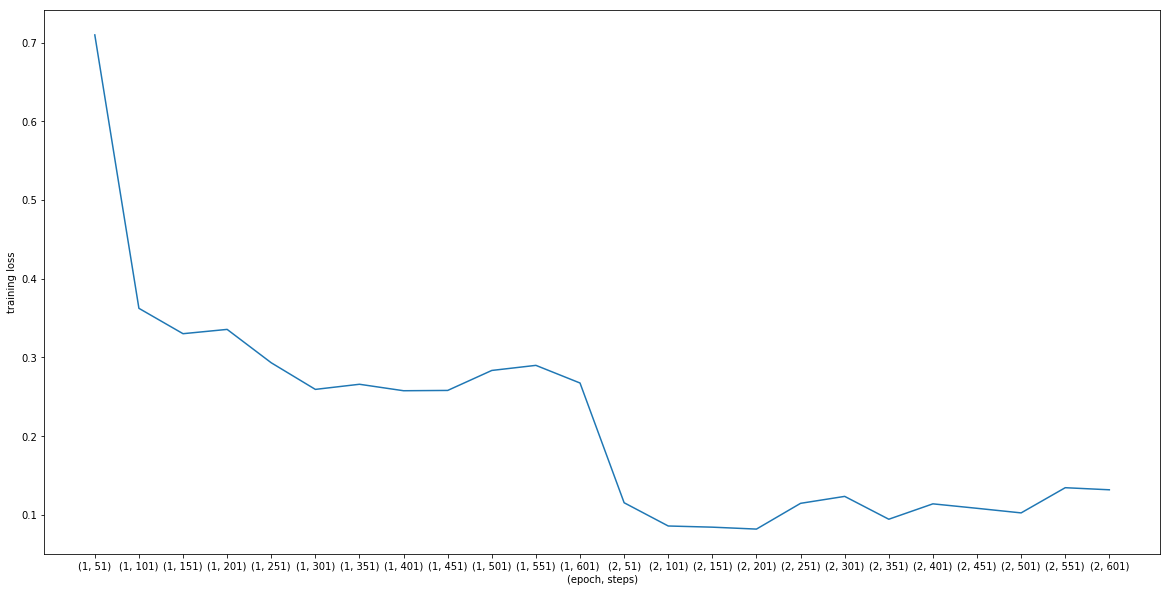

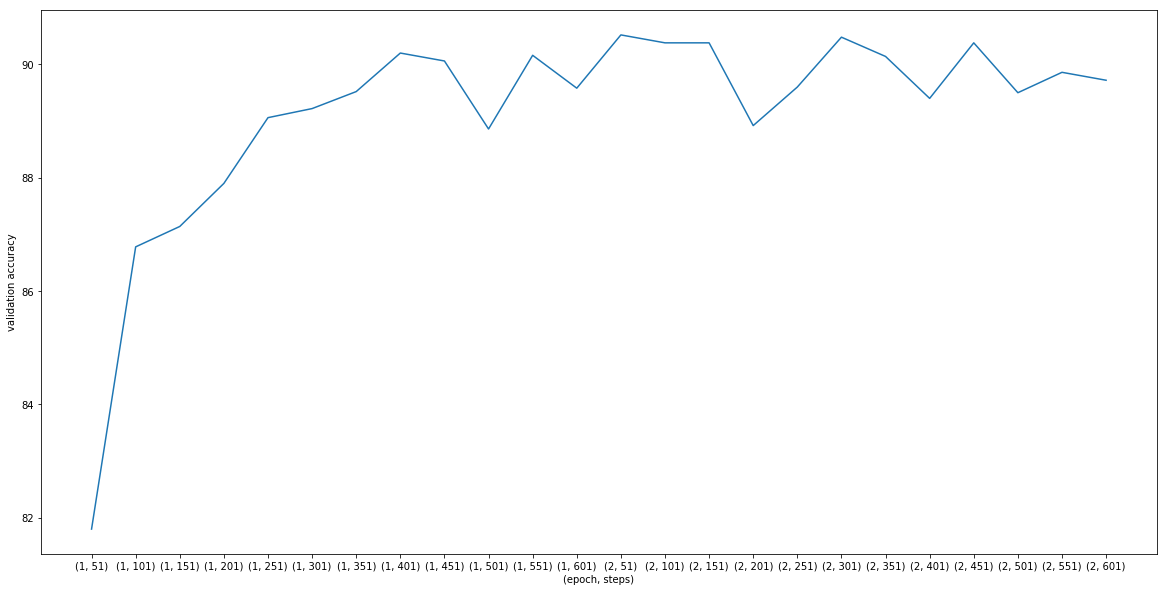

In [58]:
lr_lst = [0.001, 0.003, 0.005, 0.008,0.01, 0.02]
best_lr = tune_learning_rate(lr_lst, train_loader, val_loader, id2token)

In [59]:
best_lr

0.003

In [64]:
def tune_linear_annealing(is_la, train_loader, val_loader, id2token):
    max_val_acc = -1
    best_la = -1
    for la_i in is_la:
        
        print("reduce learning: ", la_i)
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(best_emb, best_lr, num_epochs_default, train_loader, val_loader,id2token, best_opt, la_i)
        print ("Val Acc {}".format(val_acc_i))
        
        #plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.title("linear annealing="+str(la_i)+"; training curve")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.title("linear annealing="+str(la_i)+"; validation curve")
        plt.show()
        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_la = la_i
    return best_la

reduce learning:  True
Epoch: [1/2], Step: [51/625], trainning loss: 1.350897272825241, Validation Acc: 53.26
Epoch: [1/2], Step: [101/625], trainning loss: 0.6603103983402252, Validation Acc: 71.72
Epoch: [1/2], Step: [151/625], trainning loss: 0.5992198050022125, Validation Acc: 76.42
Epoch: [1/2], Step: [201/625], trainning loss: 0.5471531879901886, Validation Acc: 79.4
Epoch: [1/2], Step: [251/625], trainning loss: 0.4631995868682861, Validation Acc: 82.82
Epoch: [1/2], Step: [301/625], trainning loss: 0.4238582843542099, Validation Acc: 84.78
Epoch: [1/2], Step: [351/625], trainning loss: 0.3670259886980057, Validation Acc: 85.32
Epoch: [1/2], Step: [401/625], trainning loss: 0.3431171649694443, Validation Acc: 86.52
Epoch: [1/2], Step: [451/625], trainning loss: 0.32076344519853595, Validation Acc: 87.3
Epoch: [1/2], Step: [501/625], trainning loss: 0.3287150549888611, Validation Acc: 88.1
Epoch: [1/2], Step: [551/625], trainning loss: 0.2922861537337303, Validation Acc: 87.92
Ep

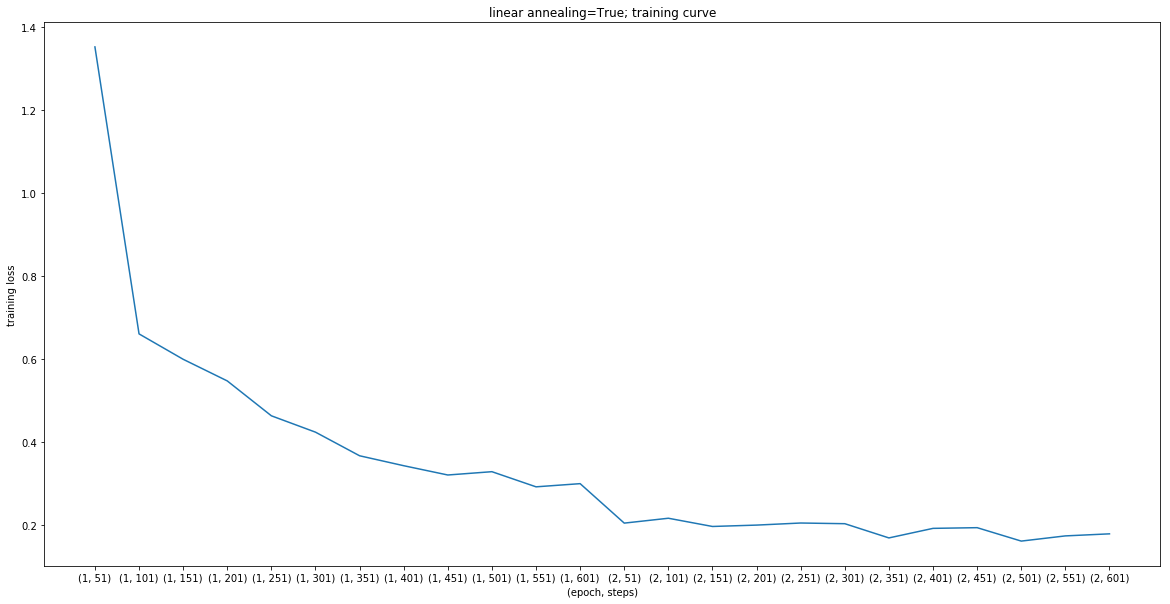

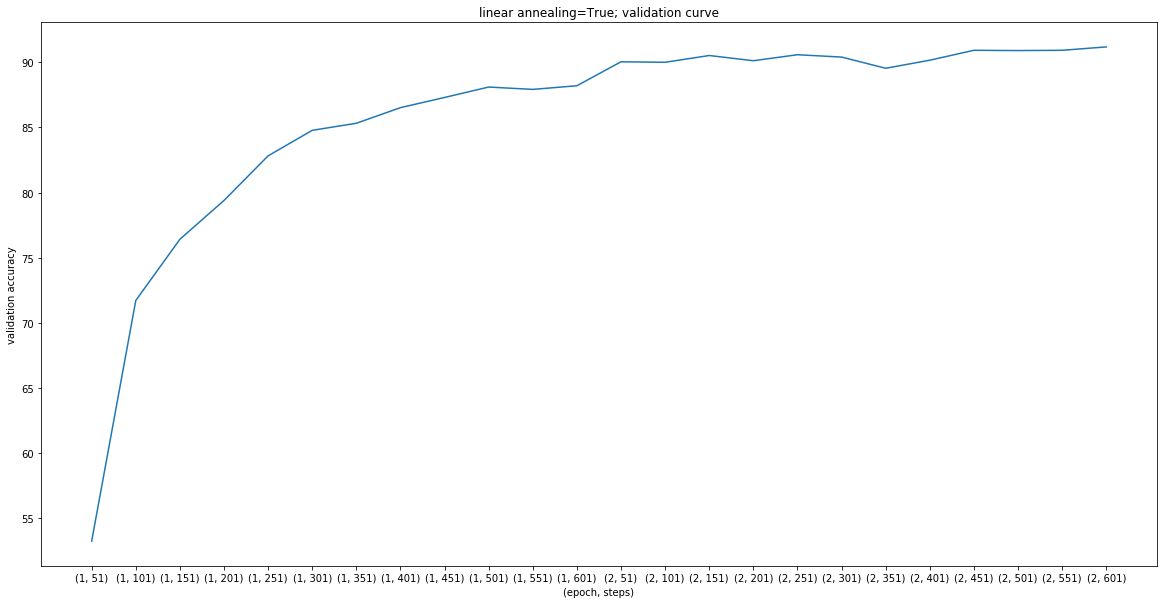

reduce learning:  False
Epoch: [1/2], Step: [51/625], trainning loss: 1.375379559993744, Validation Acc: 65.96
Epoch: [1/2], Step: [101/625], trainning loss: 0.6614989829063416, Validation Acc: 63.72
Epoch: [1/2], Step: [151/625], trainning loss: 0.6020626139640808, Validation Acc: 79.1
Epoch: [1/2], Step: [201/625], trainning loss: 0.5220818054676056, Validation Acc: 81.12
Epoch: [1/2], Step: [251/625], trainning loss: 0.46844150066375734, Validation Acc: 83.44
Epoch: [1/2], Step: [301/625], trainning loss: 0.4055911573767662, Validation Acc: 84.88
Epoch: [1/2], Step: [351/625], trainning loss: 0.3747962206602097, Validation Acc: 86.34
Epoch: [1/2], Step: [401/625], trainning loss: 0.3519635769724846, Validation Acc: 87.02
Epoch: [1/2], Step: [451/625], trainning loss: 0.2978243550658226, Validation Acc: 88.02
Epoch: [1/2], Step: [501/625], trainning loss: 0.317013603746891, Validation Acc: 87.82
Epoch: [1/2], Step: [551/625], trainning loss: 0.3059379801154137, Validation Acc: 89.36


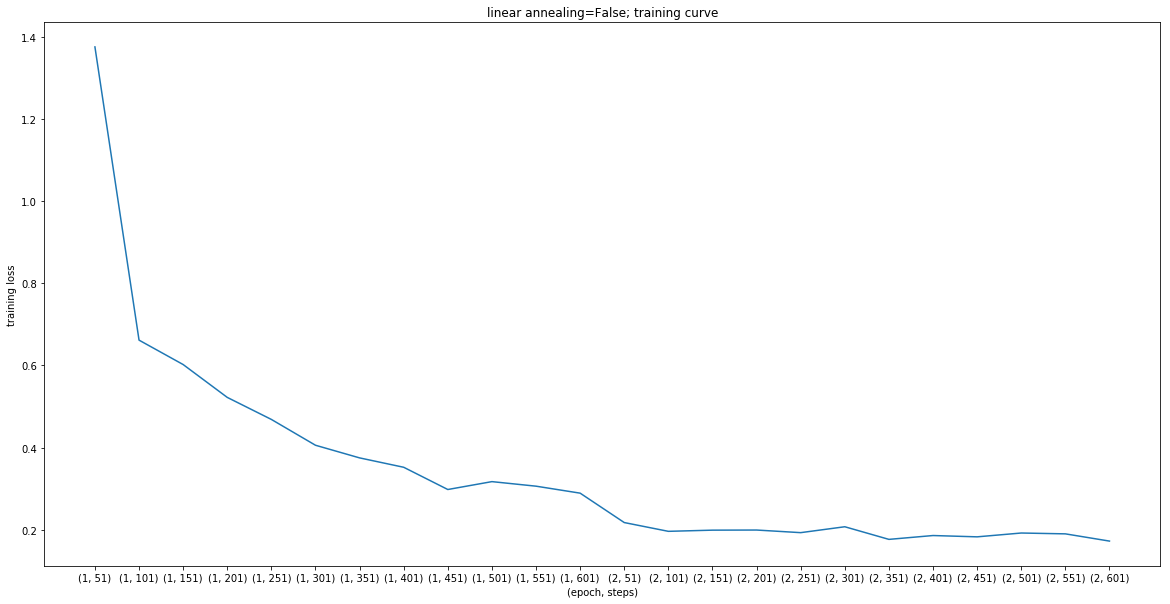

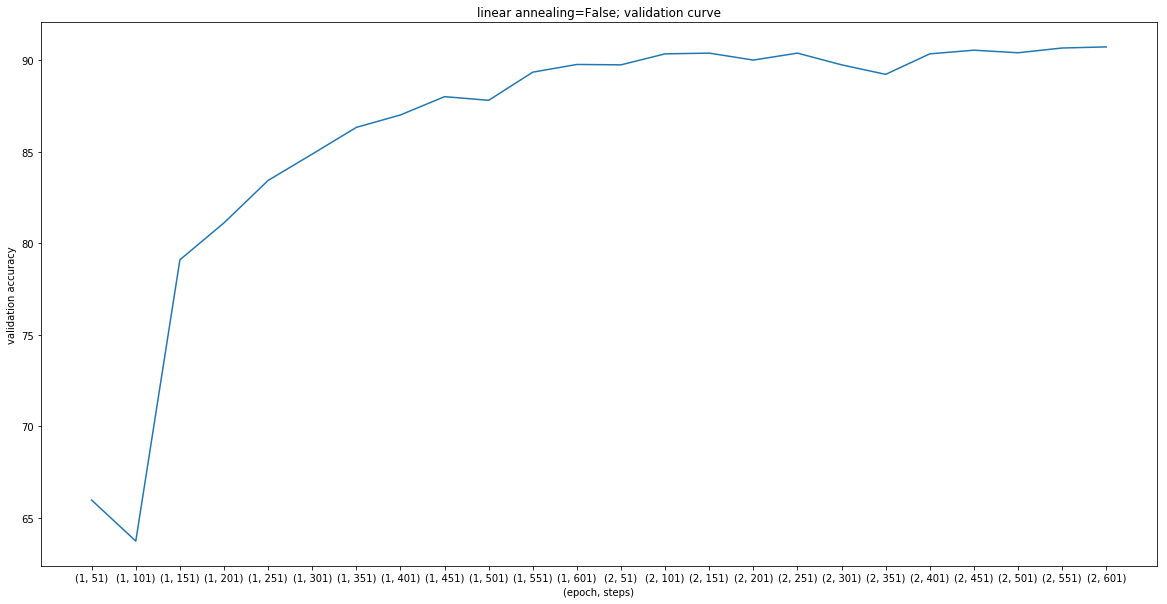

In [67]:
is_la = [True, False]
best_la = tune_linear_annealing(is_la, train_loader, val_loader, id2token)

In [68]:
best_la

True

In [69]:
num_epochs = num_epochs_default
model = BagOfWords(len(id2token), best_emb)
criterion = torch.nn.CrossEntropyLoss()  
if best_opt == "adam":
    optimizer = torch.optim.Adam(model.parameters(), lr=best_lr)
else:
    optimizer = torch.optim.SGD(model.parameters(), lr=best_lr)

if best_la:
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=(lambda ep: 0.95**ep))

val_accuracy = []
train_loss = []
epoch_list = []
for epoch in range(num_epochs):
        running_loss = 0
        if best_la:
            scheduler.step()
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i > 0 and i % 50 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                train_loss.append(running_loss/50)
                val_accuracy.append(val_acc)
                epoch_list.append(str((epoch+1, i+1)))
                print('Epoch: [{}/{}], Step: [{}/{}], trainning loss: {}, Validation Acc: {}'.format( 
                   epoch+1, num_epochs, i+1, len(train_loader), running_loss/50,val_acc))
                running_loss = 0


val_acc_i = test_model(val_loader, model)
print ("Val Acc {}".format(val_acc_i))



Epoch: [1/2], Step: [51/625], trainning loss: 1.40868199467659, Validation Acc: 60.42
Epoch: [1/2], Step: [101/625], trainning loss: 0.6724040365219116, Validation Acc: 64.42
Epoch: [1/2], Step: [151/625], trainning loss: 0.6138181746006012, Validation Acc: 75.88
Epoch: [1/2], Step: [201/625], trainning loss: 0.5286616039276123, Validation Acc: 81.46
Epoch: [1/2], Step: [251/625], trainning loss: 0.4632324630022049, Validation Acc: 77.86
Epoch: [1/2], Step: [301/625], trainning loss: 0.4160905462503433, Validation Acc: 85.66
Epoch: [1/2], Step: [351/625], trainning loss: 0.36345990270376205, Validation Acc: 86.8
Epoch: [1/2], Step: [401/625], trainning loss: 0.3426848056912422, Validation Acc: 87.58
Epoch: [1/2], Step: [451/625], trainning loss: 0.3088549184799194, Validation Acc: 85.98
Epoch: [1/2], Step: [501/625], trainning loss: 0.3215449059009552, Validation Acc: 88.86
Epoch: [1/2], Step: [551/625], trainning loss: 0.2806543606519699, Validation Acc: 89.08
Epoch: [1/2], Step: [601

In [86]:
correct = 0
total = 0
model.eval()

for data, lengths, labels in test_loader:
    data_batch, length_batch, label_batch = data, lengths, labels
    outputs = F.softmax(model(data_batch, length_batch), dim=1)
    predicted = outputs.max(1, keepdim=True)[1]

    total += labels.size(0)
    
    correct += predicted.eq(labels.view_as(predicted)).sum().item()
    
test_acc_i = 100 * correct / total
print ("test Acc {}".format(test_acc_i))

test Acc 89.74


In [112]:
# get correct and incorrect examples
correct_list = []
incorrect_list = []
c_lab = []
inc_lab = []

for idx, test_data_tokens_nh_i in enumerate(test_data_tokens_nh[:50]):
    test_data_indices_i = token2index_dataset([test_data_tokens_nh_i], token2id)
    test_dataset_i = movieDataset(test_data_indices_i, [test_target[idx]], best_msl)
    test_loader_i = torch.utils.data.DataLoader(dataset=test_dataset_i, 
                                       batch_size=1,
                                       collate_fn=lambda b: movie_collate_func(b, best_msl),
                                       shuffle=True)
    
    for data, lengths, labels in test_loader_i:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        if predicted.eq(labels.view_as(predicted)).item() == labels.item():
            correct_list.append(test_data[idx])
            c_lab.append(labels.item())
        else:
            incorrect_list.append(test_data[idx])
            inc_lab.append(labels.item())
        #print(test_data_tokens_nh_i)
        #print(test_data[idx])
        #print(labels.item())
        #print("predicted correctly: ", predicted.eq(labels.view_as(predicted)).item() == labels.item())





In [126]:
# 3 correct examples
print(c_lab[:])
for i in correct_list[:]:
    print(i)
    print('\n')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
This is a gem. As a Film Four production - the anticipated quality was indeed delivered. Shot with great style that reminded me some Errol Morris films, well arranged and simply gripping. It's long yet horrifying to the point it's excruciating. We know something bad happened (one can guess by the lack of participation of a person in the interviews) but we are compelled to see it, a bit like a car accident in slow motion. The story spans most conceivable aspects and unlike some documentaries did not try and refrain from showing the grimmer sides of the stories, as also dealing with the guilt of the people Don left behind him, wondering why they didn't stop him in time. It took me a few hours to get out of the melancholy that gripped me after seeing this very-well made documentary.


I really like this show. It has drama, romance, and comedy all rolled into one. I a

In [127]:
# 3 incorrect examples
print(inc_lab[:])
for i in incorrect_list[:]:
    print(i)
    print('\n')

[1, 1, 1, 1, 1, 1, 1, 1, 1]
Based on an actual story, John Boorman shows the struggle of an American doctor, whose husband and son were murdered and she was continually plagued with her loss. A holiday to Burma with her sister seemed like a good idea to get away from it all, but when her passport was stolen in Rangoon, she could not leave the country with her sister, and was forced to stay back until she could get I.D. papers from the American embassy. To fill in a day before she could fly out, she took a trip into the countryside with a tour guide. "I tried finding something in those stone statues, but nothing stirred in me. I was stone myself." <br /><br />Suddenly all hell broke loose and she was caught in a political revolt. Just when it looked like she had escaped and safely boarded a train, she saw her tour guide get beaten and shot. In a split second she decided to jump from the moving train and try to rescue him, with no thought of herself. Continually her life was in danger. <